In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import glob
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img
import numpy as np
from keras.layers.merge import _Merge
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import RMSprop, Adam
import keras.backend as K
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip



In [29]:
!unzip kagglecatsanddogs_3367a.zip

Archive:  kagglecatsanddogs_3367a.zip
   creating: PetImages/Cat/
  inflating: PetImages/Cat/0.jpg     
  inflating: PetImages/Cat/1.jpg     
  inflating: PetImages/Cat/10.jpg    
  inflating: PetImages/Cat/100.jpg   
  inflating: PetImages/Cat/1000.jpg  
  inflating: PetImages/Cat/10000.jpg  
  inflating: PetImages/Cat/10001.jpg  
  inflating: PetImages/Cat/10002.jpg  
  inflating: PetImages/Cat/10003.jpg  
  inflating: PetImages/Cat/10004.jpg  
  inflating: PetImages/Cat/10005.jpg  
  inflating: PetImages/Cat/10006.jpg  
  inflating: PetImages/Cat/10007.jpg  
  inflating: PetImages/Cat/10008.jpg  
  inflating: PetImages/Cat/10009.jpg  
  inflating: PetImages/Cat/1001.jpg  
  inflating: PetImages/Cat/10010.jpg  
  inflating: PetImages/Cat/10011.jpg  
  inflating: PetImages/Cat/10012.jpg  
  inflating: PetImages/Cat/10013.jpg  
  inflating: PetImages/Cat/10014.jpg  
  inflating: PetImages/Cat/10015.jpg  
  inflating: PetImages/Cat/10016.jpg  
  inflating: PetImages/Cat/10017.jpg  
  in

  inflating: PetImages/Cat/10314.jpg  
  inflating: PetImages/Cat/10315.jpg  
  inflating: PetImages/Cat/10316.jpg  
  inflating: PetImages/Cat/10317.jpg  
  inflating: PetImages/Cat/10318.jpg  
  inflating: PetImages/Cat/10319.jpg  
  inflating: PetImages/Cat/1032.jpg  
  inflating: PetImages/Cat/10320.jpg  
  inflating: PetImages/Cat/10321.jpg  
  inflating: PetImages/Cat/10322.jpg  
  inflating: PetImages/Cat/10323.jpg  
  inflating: PetImages/Cat/10324.jpg  
  inflating: PetImages/Cat/10325.jpg  
  inflating: PetImages/Cat/10326.jpg  
  inflating: PetImages/Cat/10327.jpg  
  inflating: PetImages/Cat/10328.jpg  
  inflating: PetImages/Cat/10329.jpg  
  inflating: PetImages/Cat/1033.jpg  
  inflating: PetImages/Cat/10330.jpg  
  inflating: PetImages/Cat/10331.jpg  
  inflating: PetImages/Cat/10332.jpg  
  inflating: PetImages/Cat/10333.jpg  
  inflating: PetImages/Cat/10334.jpg  
  inflating: PetImages/Cat/10335.jpg  
  inflating: PetImages/Cat/10336.jpg  
  inflating: PetImages/Cat/

  inflating: PetImages/Cat/10518.jpg  
  inflating: PetImages/Cat/10519.jpg  
  inflating: PetImages/Cat/1052.jpg  
  inflating: PetImages/Cat/10520.jpg  
  inflating: PetImages/Cat/10521.jpg  
  inflating: PetImages/Cat/10522.jpg  
  inflating: PetImages/Cat/10523.jpg  
  inflating: PetImages/Cat/10524.jpg  
  inflating: PetImages/Cat/10525.jpg  
  inflating: PetImages/Cat/10526.jpg  
  inflating: PetImages/Cat/10527.jpg  
  inflating: PetImages/Cat/10528.jpg  
  inflating: PetImages/Cat/10529.jpg  
  inflating: PetImages/Cat/1053.jpg  
  inflating: PetImages/Cat/10530.jpg  
  inflating: PetImages/Cat/10531.jpg  
  inflating: PetImages/Cat/10532.jpg  
  inflating: PetImages/Cat/10533.jpg  
  inflating: PetImages/Cat/10534.jpg  
  inflating: PetImages/Cat/10535.jpg  
  inflating: PetImages/Cat/10536.jpg  
  inflating: PetImages/Cat/10537.jpg  
  inflating: PetImages/Cat/10538.jpg  
  inflating: PetImages/Cat/10539.jpg  
  inflating: PetImages/Cat/1054.jpg  
  inflating: PetImages/Cat/1

  inflating: PetImages/Cat/10730.jpg  
  inflating: PetImages/Cat/10731.jpg  
  inflating: PetImages/Cat/10732.jpg  
  inflating: PetImages/Cat/10733.jpg  
  inflating: PetImages/Cat/10734.jpg  
  inflating: PetImages/Cat/10735.jpg  
  inflating: PetImages/Cat/10736.jpg  
  inflating: PetImages/Cat/10737.jpg  
  inflating: PetImages/Cat/10738.jpg  
  inflating: PetImages/Cat/10739.jpg  
  inflating: PetImages/Cat/1074.jpg  
  inflating: PetImages/Cat/10740.jpg  
  inflating: PetImages/Cat/10741.jpg  
  inflating: PetImages/Cat/10742.jpg  
  inflating: PetImages/Cat/10743.jpg  
  inflating: PetImages/Cat/10744.jpg  
  inflating: PetImages/Cat/10745.jpg  
  inflating: PetImages/Cat/10746.jpg  
  inflating: PetImages/Cat/10747.jpg  
  inflating: PetImages/Cat/10748.jpg  
  inflating: PetImages/Cat/10749.jpg  
  inflating: PetImages/Cat/1075.jpg  
  inflating: PetImages/Cat/10750.jpg  
  inflating: PetImages/Cat/10751.jpg  
  inflating: PetImages/Cat/10752.jpg  
  inflating: PetImages/Cat/

  inflating: PetImages/Cat/1095.jpg  
  inflating: PetImages/Cat/10950.jpg  
  inflating: PetImages/Cat/10951.jpg  
  inflating: PetImages/Cat/10952.jpg  
  inflating: PetImages/Cat/10953.jpg  
  inflating: PetImages/Cat/10954.jpg  
  inflating: PetImages/Cat/10955.jpg  
  inflating: PetImages/Cat/10956.jpg  
  inflating: PetImages/Cat/10957.jpg  
  inflating: PetImages/Cat/10958.jpg  
  inflating: PetImages/Cat/10959.jpg  
  inflating: PetImages/Cat/1096.jpg  
  inflating: PetImages/Cat/10960.jpg  
  inflating: PetImages/Cat/10961.jpg  
  inflating: PetImages/Cat/10962.jpg  
  inflating: PetImages/Cat/10963.jpg  
  inflating: PetImages/Cat/10964.jpg  
  inflating: PetImages/Cat/10965.jpg  
  inflating: PetImages/Cat/10966.jpg  
  inflating: PetImages/Cat/10967.jpg  
  inflating: PetImages/Cat/10968.jpg  
  inflating: PetImages/Cat/10969.jpg  
  inflating: PetImages/Cat/1097.jpg  
  inflating: PetImages/Cat/10970.jpg  
  inflating: PetImages/Cat/10971.jpg  
  inflating: PetImages/Cat/1

  inflating: PetImages/Cat/11364.jpg  
  inflating: PetImages/Cat/11365.jpg  
  inflating: PetImages/Cat/11366.jpg  
  inflating: PetImages/Cat/11367.jpg  
  inflating: PetImages/Cat/11368.jpg  
  inflating: PetImages/Cat/11369.jpg  
  inflating: PetImages/Cat/1137.jpg  
  inflating: PetImages/Cat/11370.jpg  
  inflating: PetImages/Cat/11371.jpg  
  inflating: PetImages/Cat/11372.jpg  
  inflating: PetImages/Cat/11373.jpg  
  inflating: PetImages/Cat/11374.jpg  
  inflating: PetImages/Cat/11375.jpg  
  inflating: PetImages/Cat/11376.jpg  
  inflating: PetImages/Cat/11377.jpg  
  inflating: PetImages/Cat/11378.jpg  
  inflating: PetImages/Cat/11379.jpg  
  inflating: PetImages/Cat/1138.jpg  
  inflating: PetImages/Cat/11380.jpg  
  inflating: PetImages/Cat/11381.jpg  
  inflating: PetImages/Cat/11382.jpg  
  inflating: PetImages/Cat/11383.jpg  
  inflating: PetImages/Cat/11384.jpg  
  inflating: PetImages/Cat/11385.jpg  
  inflating: PetImages/Cat/11386.jpg  
  inflating: PetImages/Cat/

  inflating: PetImages/Cat/11680.jpg  
  inflating: PetImages/Cat/11681.jpg  
  inflating: PetImages/Cat/11682.jpg  
  inflating: PetImages/Cat/11683.jpg  
  inflating: PetImages/Cat/11684.jpg  
  inflating: PetImages/Cat/11685.jpg  
  inflating: PetImages/Cat/11686.jpg  
  inflating: PetImages/Cat/11687.jpg  
  inflating: PetImages/Cat/11688.jpg  
  inflating: PetImages/Cat/11689.jpg  
  inflating: PetImages/Cat/1169.jpg  
  inflating: PetImages/Cat/11690.jpg  
  inflating: PetImages/Cat/11691.jpg  
  inflating: PetImages/Cat/11692.jpg  
  inflating: PetImages/Cat/11693.jpg  
  inflating: PetImages/Cat/11694.jpg  
  inflating: PetImages/Cat/11695.jpg  
  inflating: PetImages/Cat/11696.jpg  
  inflating: PetImages/Cat/11697.jpg  
  inflating: PetImages/Cat/11698.jpg  
  inflating: PetImages/Cat/11699.jpg  
  inflating: PetImages/Cat/117.jpg   
  inflating: PetImages/Cat/1170.jpg  
  inflating: PetImages/Cat/11700.jpg  
  inflating: PetImages/Cat/11701.jpg  
  inflating: PetImages/Cat/1

  inflating: PetImages/Cat/12106.jpg  
  inflating: PetImages/Cat/12107.jpg  
  inflating: PetImages/Cat/12108.jpg  
  inflating: PetImages/Cat/12109.jpg  
  inflating: PetImages/Cat/1211.jpg  
  inflating: PetImages/Cat/12110.jpg  
  inflating: PetImages/Cat/12111.jpg  
  inflating: PetImages/Cat/12112.jpg  
  inflating: PetImages/Cat/12113.jpg  
  inflating: PetImages/Cat/12114.jpg  
  inflating: PetImages/Cat/12115.jpg  
  inflating: PetImages/Cat/12116.jpg  
  inflating: PetImages/Cat/12117.jpg  
  inflating: PetImages/Cat/12118.jpg  
  inflating: PetImages/Cat/12119.jpg  
  inflating: PetImages/Cat/1212.jpg  
  inflating: PetImages/Cat/12120.jpg  
  inflating: PetImages/Cat/12121.jpg  
  inflating: PetImages/Cat/12122.jpg  
  inflating: PetImages/Cat/12123.jpg  
  inflating: PetImages/Cat/12124.jpg  
  inflating: PetImages/Cat/12125.jpg  
  inflating: PetImages/Cat/12126.jpg  
  inflating: PetImages/Cat/12127.jpg  
  inflating: PetImages/Cat/12128.jpg  
  inflating: PetImages/Cat/

  inflating: PetImages/Cat/12433.jpg  
  inflating: PetImages/Cat/12434.jpg  
  inflating: PetImages/Cat/12435.jpg  
  inflating: PetImages/Cat/12436.jpg  
  inflating: PetImages/Cat/12437.jpg  
  inflating: PetImages/Cat/12438.jpg  
  inflating: PetImages/Cat/12439.jpg  
  inflating: PetImages/Cat/1244.jpg  
  inflating: PetImages/Cat/12440.jpg  
  inflating: PetImages/Cat/12441.jpg  
  inflating: PetImages/Cat/12442.jpg  
  inflating: PetImages/Cat/12443.jpg  
  inflating: PetImages/Cat/12444.jpg  
  inflating: PetImages/Cat/12445.jpg  
  inflating: PetImages/Cat/12446.jpg  
  inflating: PetImages/Cat/12447.jpg  
  inflating: PetImages/Cat/12448.jpg  
  inflating: PetImages/Cat/12449.jpg  
  inflating: PetImages/Cat/1245.jpg  
  inflating: PetImages/Cat/12450.jpg  
  inflating: PetImages/Cat/12451.jpg  
  inflating: PetImages/Cat/12452.jpg  
  inflating: PetImages/Cat/12453.jpg  
  inflating: PetImages/Cat/12454.jpg  
  inflating: PetImages/Cat/12455.jpg  
  inflating: PetImages/Cat/

  inflating: PetImages/Cat/1443.jpg  
  inflating: PetImages/Cat/1444.jpg  
  inflating: PetImages/Cat/1445.jpg  
  inflating: PetImages/Cat/1446.jpg  
  inflating: PetImages/Cat/1447.jpg  
  inflating: PetImages/Cat/1448.jpg  
  inflating: PetImages/Cat/1449.jpg  
  inflating: PetImages/Cat/145.jpg   
  inflating: PetImages/Cat/1450.jpg  
  inflating: PetImages/Cat/1451.jpg  
  inflating: PetImages/Cat/1452.jpg  
  inflating: PetImages/Cat/1453.jpg  
  inflating: PetImages/Cat/1454.jpg  
  inflating: PetImages/Cat/1455.jpg  
  inflating: PetImages/Cat/1456.jpg  
  inflating: PetImages/Cat/1457.jpg  
  inflating: PetImages/Cat/1458.jpg  
  inflating: PetImages/Cat/1459.jpg  
  inflating: PetImages/Cat/146.jpg   
  inflating: PetImages/Cat/1460.jpg  
  inflating: PetImages/Cat/1461.jpg  
  inflating: PetImages/Cat/1462.jpg  
  inflating: PetImages/Cat/1463.jpg  
  inflating: PetImages/Cat/1464.jpg  
  inflating: PetImages/Cat/1465.jpg  
  inflating: PetImages/Cat/1466.jpg  
  inflating:

  inflating: PetImages/Cat/1712.jpg  
  inflating: PetImages/Cat/1713.jpg  
  inflating: PetImages/Cat/1714.jpg  
  inflating: PetImages/Cat/1715.jpg  
  inflating: PetImages/Cat/1716.jpg  
  inflating: PetImages/Cat/1717.jpg  
  inflating: PetImages/Cat/1718.jpg  
  inflating: PetImages/Cat/1719.jpg  
  inflating: PetImages/Cat/172.jpg   
  inflating: PetImages/Cat/1720.jpg  
  inflating: PetImages/Cat/1721.jpg  
  inflating: PetImages/Cat/1722.jpg  
  inflating: PetImages/Cat/1723.jpg  
  inflating: PetImages/Cat/1724.jpg  
  inflating: PetImages/Cat/1725.jpg  
  inflating: PetImages/Cat/1726.jpg  
  inflating: PetImages/Cat/1727.jpg  
  inflating: PetImages/Cat/1728.jpg  
  inflating: PetImages/Cat/1729.jpg  
  inflating: PetImages/Cat/173.jpg   
  inflating: PetImages/Cat/1730.jpg  
  inflating: PetImages/Cat/1731.jpg  
  inflating: PetImages/Cat/1732.jpg  
  inflating: PetImages/Cat/1733.jpg  
  inflating: PetImages/Cat/1734.jpg  
  inflating: PetImages/Cat/1735.jpg  
  inflating:

  inflating: PetImages/Cat/1979.jpg  
  inflating: PetImages/Cat/198.jpg   
  inflating: PetImages/Cat/1980.jpg  
  inflating: PetImages/Cat/1981.jpg  
  inflating: PetImages/Cat/1982.jpg  
  inflating: PetImages/Cat/1983.jpg  
  inflating: PetImages/Cat/1984.jpg  
  inflating: PetImages/Cat/1985.jpg  
  inflating: PetImages/Cat/1986.jpg  
  inflating: PetImages/Cat/1987.jpg  
  inflating: PetImages/Cat/1988.jpg  
  inflating: PetImages/Cat/1989.jpg  
  inflating: PetImages/Cat/199.jpg   
  inflating: PetImages/Cat/1990.jpg  
  inflating: PetImages/Cat/1991.jpg  
  inflating: PetImages/Cat/1992.jpg  
  inflating: PetImages/Cat/1993.jpg  
  inflating: PetImages/Cat/1994.jpg  
  inflating: PetImages/Cat/1995.jpg  
  inflating: PetImages/Cat/1996.jpg  
  inflating: PetImages/Cat/1997.jpg  
  inflating: PetImages/Cat/1998.jpg  
  inflating: PetImages/Cat/1999.jpg  
  inflating: PetImages/Cat/2.jpg     
  inflating: PetImages/Cat/20.jpg    
  inflating: PetImages/Cat/200.jpg   
  inflating:

  inflating: PetImages/Cat/2255.jpg  
  inflating: PetImages/Cat/2256.jpg  
  inflating: PetImages/Cat/2257.jpg  
  inflating: PetImages/Cat/2258.jpg  
  inflating: PetImages/Cat/2259.jpg  
  inflating: PetImages/Cat/226.jpg   
  inflating: PetImages/Cat/2260.jpg  
  inflating: PetImages/Cat/2261.jpg  
  inflating: PetImages/Cat/2262.jpg  
  inflating: PetImages/Cat/2263.jpg  
  inflating: PetImages/Cat/2264.jpg  
  inflating: PetImages/Cat/2265.jpg  
  inflating: PetImages/Cat/2266.jpg  
  inflating: PetImages/Cat/2267.jpg  
  inflating: PetImages/Cat/2268.jpg  
  inflating: PetImages/Cat/2269.jpg  
  inflating: PetImages/Cat/227.jpg   
  inflating: PetImages/Cat/2270.jpg  
  inflating: PetImages/Cat/2271.jpg  
  inflating: PetImages/Cat/2272.jpg  
  inflating: PetImages/Cat/2273.jpg  
  inflating: PetImages/Cat/2274.jpg  
  inflating: PetImages/Cat/2275.jpg  
  inflating: PetImages/Cat/2276.jpg  
  inflating: PetImages/Cat/2277.jpg  
  inflating: PetImages/Cat/2278.jpg  
  inflating:

  inflating: PetImages/Cat/2532.jpg  
  inflating: PetImages/Cat/2533.jpg  
  inflating: PetImages/Cat/2534.jpg  
  inflating: PetImages/Cat/2535.jpg  
  inflating: PetImages/Cat/2536.jpg  
  inflating: PetImages/Cat/2537.jpg  
  inflating: PetImages/Cat/2538.jpg  
  inflating: PetImages/Cat/2539.jpg  
  inflating: PetImages/Cat/254.jpg   
  inflating: PetImages/Cat/2540.jpg  
  inflating: PetImages/Cat/2541.jpg  
  inflating: PetImages/Cat/2542.jpg  
  inflating: PetImages/Cat/2543.jpg  
  inflating: PetImages/Cat/2544.jpg  
  inflating: PetImages/Cat/2545.jpg  
  inflating: PetImages/Cat/2546.jpg  
  inflating: PetImages/Cat/2547.jpg  
  inflating: PetImages/Cat/2548.jpg  
  inflating: PetImages/Cat/2549.jpg  
  inflating: PetImages/Cat/255.jpg   
  inflating: PetImages/Cat/2550.jpg  
  inflating: PetImages/Cat/2551.jpg  
  inflating: PetImages/Cat/2552.jpg  
  inflating: PetImages/Cat/2553.jpg  
  inflating: PetImages/Cat/2554.jpg  
  inflating: PetImages/Cat/2555.jpg  
  inflating:

  inflating: PetImages/Cat/281.jpg   
  inflating: PetImages/Cat/2810.jpg  
  inflating: PetImages/Cat/2811.jpg  
  inflating: PetImages/Cat/2812.jpg  
  inflating: PetImages/Cat/2813.jpg  
  inflating: PetImages/Cat/2814.jpg  
  inflating: PetImages/Cat/2815.jpg  
  inflating: PetImages/Cat/2816.jpg  
  inflating: PetImages/Cat/2817.jpg  
  inflating: PetImages/Cat/2818.jpg  
  inflating: PetImages/Cat/2819.jpg  
  inflating: PetImages/Cat/282.jpg   
  inflating: PetImages/Cat/2820.jpg  
  inflating: PetImages/Cat/2821.jpg  
  inflating: PetImages/Cat/2822.jpg  
  inflating: PetImages/Cat/2823.jpg  
  inflating: PetImages/Cat/2824.jpg  
  inflating: PetImages/Cat/2825.jpg  
  inflating: PetImages/Cat/2826.jpg  
  inflating: PetImages/Cat/2827.jpg  
  inflating: PetImages/Cat/2828.jpg  
  inflating: PetImages/Cat/2829.jpg  
  inflating: PetImages/Cat/283.jpg   
  inflating: PetImages/Cat/2830.jpg  
  inflating: PetImages/Cat/2831.jpg  
  inflating: PetImages/Cat/2832.jpg  
  inflating:

  inflating: PetImages/Cat/3091.jpg  
  inflating: PetImages/Cat/3092.jpg  
  inflating: PetImages/Cat/3093.jpg  
  inflating: PetImages/Cat/3094.jpg  
  inflating: PetImages/Cat/3095.jpg  
  inflating: PetImages/Cat/3096.jpg  
  inflating: PetImages/Cat/3097.jpg  
  inflating: PetImages/Cat/3098.jpg  
  inflating: PetImages/Cat/3099.jpg  
  inflating: PetImages/Cat/31.jpg    
  inflating: PetImages/Cat/310.jpg   
  inflating: PetImages/Cat/3100.jpg  
  inflating: PetImages/Cat/3101.jpg  
  inflating: PetImages/Cat/3102.jpg  
  inflating: PetImages/Cat/3103.jpg  
  inflating: PetImages/Cat/3104.jpg  
  inflating: PetImages/Cat/3105.jpg  
  inflating: PetImages/Cat/3106.jpg  
  inflating: PetImages/Cat/3107.jpg  
  inflating: PetImages/Cat/3108.jpg  
  inflating: PetImages/Cat/3109.jpg  
  inflating: PetImages/Cat/311.jpg   
  inflating: PetImages/Cat/3110.jpg  
  inflating: PetImages/Cat/3111.jpg  
  inflating: PetImages/Cat/3112.jpg  
  inflating: PetImages/Cat/3113.jpg  
  inflating:

  inflating: PetImages/Cat/3346.jpg  
  inflating: PetImages/Cat/3347.jpg  
  inflating: PetImages/Cat/3348.jpg  
  inflating: PetImages/Cat/3349.jpg  
  inflating: PetImages/Cat/335.jpg   
  inflating: PetImages/Cat/3350.jpg  
  inflating: PetImages/Cat/3351.jpg  
  inflating: PetImages/Cat/3352.jpg  
  inflating: PetImages/Cat/3353.jpg  
  inflating: PetImages/Cat/3354.jpg  
  inflating: PetImages/Cat/3355.jpg  
  inflating: PetImages/Cat/3356.jpg  
  inflating: PetImages/Cat/3357.jpg  
  inflating: PetImages/Cat/3358.jpg  
  inflating: PetImages/Cat/3359.jpg  
  inflating: PetImages/Cat/336.jpg   
  inflating: PetImages/Cat/3360.jpg  
  inflating: PetImages/Cat/3361.jpg  
  inflating: PetImages/Cat/3362.jpg  
  inflating: PetImages/Cat/3363.jpg  
  inflating: PetImages/Cat/3364.jpg  
  inflating: PetImages/Cat/3365.jpg  
  inflating: PetImages/Cat/3366.jpg  
  inflating: PetImages/Cat/3367.jpg  
  inflating: PetImages/Cat/3368.jpg  
  inflating: PetImages/Cat/3369.jpg  
  inflating:

  inflating: PetImages/Cat/3609.jpg  
  inflating: PetImages/Cat/361.jpg   
  inflating: PetImages/Cat/3610.jpg  
  inflating: PetImages/Cat/3611.jpg  
  inflating: PetImages/Cat/3612.jpg  
  inflating: PetImages/Cat/3613.jpg  
  inflating: PetImages/Cat/3614.jpg  
  inflating: PetImages/Cat/3615.jpg  
  inflating: PetImages/Cat/3616.jpg  
  inflating: PetImages/Cat/3617.jpg  
  inflating: PetImages/Cat/3618.jpg  
  inflating: PetImages/Cat/3619.jpg  
  inflating: PetImages/Cat/362.jpg   
  inflating: PetImages/Cat/3620.jpg  
  inflating: PetImages/Cat/3621.jpg  
  inflating: PetImages/Cat/3622.jpg  
  inflating: PetImages/Cat/3623.jpg  
  inflating: PetImages/Cat/3624.jpg  
  inflating: PetImages/Cat/3625.jpg  
  inflating: PetImages/Cat/3626.jpg  
  inflating: PetImages/Cat/3627.jpg  
  inflating: PetImages/Cat/3628.jpg  
  inflating: PetImages/Cat/3629.jpg  
  inflating: PetImages/Cat/363.jpg   
  inflating: PetImages/Cat/3630.jpg  
  inflating: PetImages/Cat/3631.jpg  
  inflating:

  inflating: PetImages/Cat/3856.jpg  
  inflating: PetImages/Cat/3857.jpg  
  inflating: PetImages/Cat/3858.jpg  
  inflating: PetImages/Cat/3859.jpg  
  inflating: PetImages/Cat/386.jpg   
  inflating: PetImages/Cat/3860.jpg  
  inflating: PetImages/Cat/3861.jpg  
  inflating: PetImages/Cat/3862.jpg  
  inflating: PetImages/Cat/3863.jpg  
  inflating: PetImages/Cat/3864.jpg  
  inflating: PetImages/Cat/3865.jpg  
  inflating: PetImages/Cat/3866.jpg  
  inflating: PetImages/Cat/3867.jpg  
  inflating: PetImages/Cat/3868.jpg  
  inflating: PetImages/Cat/3869.jpg  
  inflating: PetImages/Cat/387.jpg   
  inflating: PetImages/Cat/3870.jpg  
  inflating: PetImages/Cat/3871.jpg  
  inflating: PetImages/Cat/3872.jpg  
  inflating: PetImages/Cat/3873.jpg  
  inflating: PetImages/Cat/3874.jpg  
  inflating: PetImages/Cat/3875.jpg  
  inflating: PetImages/Cat/3876.jpg  
  inflating: PetImages/Cat/3877.jpg  
  inflating: PetImages/Cat/3878.jpg  
  inflating: PetImages/Cat/3879.jpg  
  inflating:

  inflating: PetImages/Cat/4111.jpg  
  inflating: PetImages/Cat/4112.jpg  
  inflating: PetImages/Cat/4113.jpg  
  inflating: PetImages/Cat/4114.jpg  
  inflating: PetImages/Cat/4115.jpg  
  inflating: PetImages/Cat/4116.jpg  
  inflating: PetImages/Cat/4117.jpg  
  inflating: PetImages/Cat/4118.jpg  
  inflating: PetImages/Cat/4119.jpg  
  inflating: PetImages/Cat/412.jpg   
  inflating: PetImages/Cat/4120.jpg  
  inflating: PetImages/Cat/4121.jpg  
  inflating: PetImages/Cat/4122.jpg  
  inflating: PetImages/Cat/4123.jpg  
  inflating: PetImages/Cat/4124.jpg  
  inflating: PetImages/Cat/4125.jpg  
  inflating: PetImages/Cat/4126.jpg  
  inflating: PetImages/Cat/4127.jpg  
  inflating: PetImages/Cat/4128.jpg  
  inflating: PetImages/Cat/4129.jpg  
  inflating: PetImages/Cat/413.jpg   
  inflating: PetImages/Cat/4130.jpg  
  inflating: PetImages/Cat/4131.jpg  
  inflating: PetImages/Cat/4132.jpg  
  inflating: PetImages/Cat/4133.jpg  
  inflating: PetImages/Cat/4134.jpg  
  inflating:

  inflating: PetImages/Cat/4378.jpg  
  inflating: PetImages/Cat/4379.jpg  
  inflating: PetImages/Cat/438.jpg   
  inflating: PetImages/Cat/4380.jpg  
  inflating: PetImages/Cat/4381.jpg  
  inflating: PetImages/Cat/4382.jpg  
  inflating: PetImages/Cat/4383.jpg  
  inflating: PetImages/Cat/4384.jpg  
  inflating: PetImages/Cat/4385.jpg  
  inflating: PetImages/Cat/4386.jpg  
  inflating: PetImages/Cat/4387.jpg  
  inflating: PetImages/Cat/4388.jpg  
  inflating: PetImages/Cat/4389.jpg  
  inflating: PetImages/Cat/439.jpg   
  inflating: PetImages/Cat/4390.jpg  
  inflating: PetImages/Cat/4391.jpg  
  inflating: PetImages/Cat/4392.jpg  
  inflating: PetImages/Cat/4393.jpg  
  inflating: PetImages/Cat/4394.jpg  
  inflating: PetImages/Cat/4395.jpg  
  inflating: PetImages/Cat/4396.jpg  
  inflating: PetImages/Cat/4397.jpg  
  inflating: PetImages/Cat/4398.jpg  
  inflating: PetImages/Cat/4399.jpg  
  inflating: PetImages/Cat/44.jpg    
  inflating: PetImages/Cat/440.jpg   
  inflating:

  inflating: PetImages/Cat/4655.jpg  
  inflating: PetImages/Cat/4656.jpg  
  inflating: PetImages/Cat/4657.jpg  
  inflating: PetImages/Cat/4658.jpg  
  inflating: PetImages/Cat/4659.jpg  
  inflating: PetImages/Cat/466.jpg   
  inflating: PetImages/Cat/4660.jpg  
  inflating: PetImages/Cat/4661.jpg  
  inflating: PetImages/Cat/4662.jpg  
  inflating: PetImages/Cat/4663.jpg  
  inflating: PetImages/Cat/4664.jpg  
  inflating: PetImages/Cat/4665.jpg  
  inflating: PetImages/Cat/4666.jpg  
  inflating: PetImages/Cat/4667.jpg  
  inflating: PetImages/Cat/4668.jpg  
  inflating: PetImages/Cat/4669.jpg  
  inflating: PetImages/Cat/467.jpg   
  inflating: PetImages/Cat/4670.jpg  
  inflating: PetImages/Cat/4671.jpg  
  inflating: PetImages/Cat/4672.jpg  
  inflating: PetImages/Cat/4673.jpg  
  inflating: PetImages/Cat/4674.jpg  
  inflating: PetImages/Cat/4675.jpg  
  inflating: PetImages/Cat/4676.jpg  
  inflating: PetImages/Cat/4677.jpg  
  inflating: PetImages/Cat/4678.jpg  
  inflating:

  inflating: PetImages/Cat/4927.jpg  
  inflating: PetImages/Cat/4928.jpg  
  inflating: PetImages/Cat/4929.jpg  
  inflating: PetImages/Cat/493.jpg   
  inflating: PetImages/Cat/4930.jpg  
  inflating: PetImages/Cat/4931.jpg  
  inflating: PetImages/Cat/4932.jpg  
  inflating: PetImages/Cat/4933.jpg  
  inflating: PetImages/Cat/4934.jpg  
  inflating: PetImages/Cat/4935.jpg  
  inflating: PetImages/Cat/4936.jpg  
  inflating: PetImages/Cat/4937.jpg  
  inflating: PetImages/Cat/4938.jpg  
  inflating: PetImages/Cat/4939.jpg  
  inflating: PetImages/Cat/494.jpg   
  inflating: PetImages/Cat/4940.jpg  
  inflating: PetImages/Cat/4941.jpg  
  inflating: PetImages/Cat/4942.jpg  
  inflating: PetImages/Cat/4943.jpg  
  inflating: PetImages/Cat/4944.jpg  
  inflating: PetImages/Cat/4945.jpg  
  inflating: PetImages/Cat/4946.jpg  
  inflating: PetImages/Cat/4947.jpg  
  inflating: PetImages/Cat/4948.jpg  
  inflating: PetImages/Cat/4949.jpg  
  inflating: PetImages/Cat/495.jpg   
  inflating:

  inflating: PetImages/Cat/5187.jpg  
  inflating: PetImages/Cat/5188.jpg  
  inflating: PetImages/Cat/5189.jpg  
  inflating: PetImages/Cat/519.jpg   
  inflating: PetImages/Cat/5190.jpg  
  inflating: PetImages/Cat/5191.jpg  
  inflating: PetImages/Cat/5192.jpg  
  inflating: PetImages/Cat/5193.jpg  
  inflating: PetImages/Cat/5194.jpg  
  inflating: PetImages/Cat/5195.jpg  
  inflating: PetImages/Cat/5196.jpg  
  inflating: PetImages/Cat/5197.jpg  
  inflating: PetImages/Cat/5198.jpg  
  inflating: PetImages/Cat/5199.jpg  
  inflating: PetImages/Cat/52.jpg    
  inflating: PetImages/Cat/520.jpg   
  inflating: PetImages/Cat/5200.jpg  
  inflating: PetImages/Cat/5201.jpg  
  inflating: PetImages/Cat/5202.jpg  
  inflating: PetImages/Cat/5203.jpg  
  inflating: PetImages/Cat/5204.jpg  
  inflating: PetImages/Cat/5205.jpg  
  inflating: PetImages/Cat/5206.jpg  
  inflating: PetImages/Cat/5207.jpg  
  inflating: PetImages/Cat/5208.jpg  
  inflating: PetImages/Cat/5209.jpg  
  inflating:

  inflating: PetImages/Cat/5459.jpg  
  inflating: PetImages/Cat/546.jpg   
  inflating: PetImages/Cat/5460.jpg  
  inflating: PetImages/Cat/5461.jpg  
  inflating: PetImages/Cat/5462.jpg  
  inflating: PetImages/Cat/5463.jpg  
  inflating: PetImages/Cat/5464.jpg  
  inflating: PetImages/Cat/5465.jpg  
  inflating: PetImages/Cat/5466.jpg  
  inflating: PetImages/Cat/5467.jpg  
  inflating: PetImages/Cat/5468.jpg  
  inflating: PetImages/Cat/5469.jpg  
  inflating: PetImages/Cat/547.jpg   
  inflating: PetImages/Cat/5470.jpg  
  inflating: PetImages/Cat/5471.jpg  
  inflating: PetImages/Cat/5472.jpg  
  inflating: PetImages/Cat/5473.jpg  
  inflating: PetImages/Cat/5474.jpg  
  inflating: PetImages/Cat/5475.jpg  
  inflating: PetImages/Cat/5476.jpg  
  inflating: PetImages/Cat/5477.jpg  
  inflating: PetImages/Cat/5478.jpg  
  inflating: PetImages/Cat/5479.jpg  
  inflating: PetImages/Cat/548.jpg   
  inflating: PetImages/Cat/5480.jpg  
  inflating: PetImages/Cat/5481.jpg  
  inflating:

  inflating: PetImages/Cat/5709.jpg  
  inflating: PetImages/Cat/571.jpg   
  inflating: PetImages/Cat/5710.jpg  
  inflating: PetImages/Cat/5711.jpg  
  inflating: PetImages/Cat/5712.jpg  
  inflating: PetImages/Cat/5713.jpg  
  inflating: PetImages/Cat/5714.jpg  
  inflating: PetImages/Cat/5715.jpg  
  inflating: PetImages/Cat/5716.jpg  
  inflating: PetImages/Cat/5717.jpg  
  inflating: PetImages/Cat/5718.jpg  
  inflating: PetImages/Cat/5719.jpg  
  inflating: PetImages/Cat/572.jpg   
  inflating: PetImages/Cat/5720.jpg  
  inflating: PetImages/Cat/5721.jpg  
  inflating: PetImages/Cat/5722.jpg  
  inflating: PetImages/Cat/5723.jpg  
  inflating: PetImages/Cat/5724.jpg  
  inflating: PetImages/Cat/5725.jpg  
  inflating: PetImages/Cat/5726.jpg  
  inflating: PetImages/Cat/5727.jpg  
  inflating: PetImages/Cat/5728.jpg  
  inflating: PetImages/Cat/5729.jpg  
  inflating: PetImages/Cat/573.jpg   
  inflating: PetImages/Cat/5730.jpg  
  inflating: PetImages/Cat/5731.jpg  
  inflating:

  inflating: PetImages/Cat/5981.jpg  
  inflating: PetImages/Cat/5982.jpg  
  inflating: PetImages/Cat/5983.jpg  
  inflating: PetImages/Cat/5984.jpg  
  inflating: PetImages/Cat/5985.jpg  
  inflating: PetImages/Cat/5986.jpg  
  inflating: PetImages/Cat/5987.jpg  
  inflating: PetImages/Cat/5988.jpg  
  inflating: PetImages/Cat/5989.jpg  
  inflating: PetImages/Cat/599.jpg   
  inflating: PetImages/Cat/5990.jpg  
  inflating: PetImages/Cat/5991.jpg  
  inflating: PetImages/Cat/5992.jpg  
  inflating: PetImages/Cat/5993.jpg  
  inflating: PetImages/Cat/5994.jpg  
  inflating: PetImages/Cat/5995.jpg  
  inflating: PetImages/Cat/5996.jpg  
  inflating: PetImages/Cat/5997.jpg  
  inflating: PetImages/Cat/5998.jpg  
  inflating: PetImages/Cat/5999.jpg  
  inflating: PetImages/Cat/6.jpg     
  inflating: PetImages/Cat/60.jpg    
  inflating: PetImages/Cat/600.jpg   
  inflating: PetImages/Cat/6000.jpg  
  inflating: PetImages/Cat/6001.jpg  
  inflating: PetImages/Cat/6002.jpg  
  inflating:

  inflating: PetImages/Cat/6265.jpg  
  inflating: PetImages/Cat/6266.jpg  
  inflating: PetImages/Cat/6267.jpg  
  inflating: PetImages/Cat/6268.jpg  
  inflating: PetImages/Cat/6269.jpg  
  inflating: PetImages/Cat/627.jpg   
  inflating: PetImages/Cat/6270.jpg  
  inflating: PetImages/Cat/6271.jpg  
  inflating: PetImages/Cat/6272.jpg  
  inflating: PetImages/Cat/6273.jpg  
  inflating: PetImages/Cat/6274.jpg  
  inflating: PetImages/Cat/6275.jpg  
  inflating: PetImages/Cat/6276.jpg  
  inflating: PetImages/Cat/6277.jpg  
  inflating: PetImages/Cat/6278.jpg  
  inflating: PetImages/Cat/6279.jpg  
  inflating: PetImages/Cat/628.jpg   
  inflating: PetImages/Cat/6280.jpg  
  inflating: PetImages/Cat/6281.jpg  
  inflating: PetImages/Cat/6282.jpg  
  inflating: PetImages/Cat/6283.jpg  
  inflating: PetImages/Cat/6284.jpg  
  inflating: PetImages/Cat/6285.jpg  
  inflating: PetImages/Cat/6286.jpg  
  inflating: PetImages/Cat/6287.jpg  
  inflating: PetImages/Cat/6288.jpg  
  inflating:

  inflating: PetImages/Cat/6530.jpg  
  inflating: PetImages/Cat/6531.jpg  
  inflating: PetImages/Cat/6532.jpg  
  inflating: PetImages/Cat/6533.jpg  
  inflating: PetImages/Cat/6534.jpg  
  inflating: PetImages/Cat/6535.jpg  
  inflating: PetImages/Cat/6536.jpg  
  inflating: PetImages/Cat/6537.jpg  
  inflating: PetImages/Cat/6538.jpg  
  inflating: PetImages/Cat/6539.jpg  
  inflating: PetImages/Cat/654.jpg   
  inflating: PetImages/Cat/6540.jpg  
  inflating: PetImages/Cat/6541.jpg  
  inflating: PetImages/Cat/6542.jpg  
  inflating: PetImages/Cat/6543.jpg  
  inflating: PetImages/Cat/6544.jpg  
  inflating: PetImages/Cat/6545.jpg  
  inflating: PetImages/Cat/6546.jpg  
  inflating: PetImages/Cat/6547.jpg  
  inflating: PetImages/Cat/6548.jpg  
  inflating: PetImages/Cat/6549.jpg  
  inflating: PetImages/Cat/655.jpg   
  inflating: PetImages/Cat/6550.jpg  
  inflating: PetImages/Cat/6551.jpg  
  inflating: PetImages/Cat/6552.jpg  
  inflating: PetImages/Cat/6553.jpg  
  inflating:

  inflating: PetImages/Cat/680.jpg   
  inflating: PetImages/Cat/6800.jpg  
  inflating: PetImages/Cat/6801.jpg  
  inflating: PetImages/Cat/6802.jpg  
  inflating: PetImages/Cat/6803.jpg  
  inflating: PetImages/Cat/6804.jpg  
  inflating: PetImages/Cat/6805.jpg  
  inflating: PetImages/Cat/6806.jpg  
  inflating: PetImages/Cat/6807.jpg  
  inflating: PetImages/Cat/6808.jpg  
  inflating: PetImages/Cat/6809.jpg  
  inflating: PetImages/Cat/681.jpg   
  inflating: PetImages/Cat/6810.jpg  
  inflating: PetImages/Cat/6811.jpg  
  inflating: PetImages/Cat/6812.jpg  
  inflating: PetImages/Cat/6813.jpg  
  inflating: PetImages/Cat/6814.jpg  
  inflating: PetImages/Cat/6815.jpg  
  inflating: PetImages/Cat/6816.jpg  
  inflating: PetImages/Cat/6817.jpg  
  inflating: PetImages/Cat/6818.jpg  
  inflating: PetImages/Cat/6819.jpg  
  inflating: PetImages/Cat/682.jpg   
  inflating: PetImages/Cat/6820.jpg  
  inflating: PetImages/Cat/6821.jpg  
  inflating: PetImages/Cat/6822.jpg  
  inflating:

  inflating: PetImages/Cat/706.jpg   
  inflating: PetImages/Cat/7060.jpg  
  inflating: PetImages/Cat/7061.jpg  
  inflating: PetImages/Cat/7062.jpg  
  inflating: PetImages/Cat/7063.jpg  
  inflating: PetImages/Cat/7064.jpg  
  inflating: PetImages/Cat/7065.jpg  
  inflating: PetImages/Cat/7066.jpg  
  inflating: PetImages/Cat/7067.jpg  
  inflating: PetImages/Cat/7068.jpg  
  inflating: PetImages/Cat/7069.jpg  
  inflating: PetImages/Cat/707.jpg   
  inflating: PetImages/Cat/7070.jpg  
  inflating: PetImages/Cat/7071.jpg  
  inflating: PetImages/Cat/7072.jpg  
  inflating: PetImages/Cat/7073.jpg  
  inflating: PetImages/Cat/7074.jpg  
  inflating: PetImages/Cat/7075.jpg  
  inflating: PetImages/Cat/7076.jpg  
  inflating: PetImages/Cat/7077.jpg  
  inflating: PetImages/Cat/7078.jpg  
  inflating: PetImages/Cat/7079.jpg  
  inflating: PetImages/Cat/708.jpg   
  inflating: PetImages/Cat/7080.jpg  
  inflating: PetImages/Cat/7081.jpg  
  inflating: PetImages/Cat/7082.jpg  
  inflating:

  inflating: PetImages/Cat/7349.jpg  
  inflating: PetImages/Cat/735.jpg   
  inflating: PetImages/Cat/7350.jpg  
  inflating: PetImages/Cat/7351.jpg  
  inflating: PetImages/Cat/7352.jpg  
  inflating: PetImages/Cat/7353.jpg  
  inflating: PetImages/Cat/7354.jpg  
  inflating: PetImages/Cat/7355.jpg  
  inflating: PetImages/Cat/7356.jpg  
  inflating: PetImages/Cat/7357.jpg  
  inflating: PetImages/Cat/7358.jpg  
  inflating: PetImages/Cat/7359.jpg  
  inflating: PetImages/Cat/736.jpg   
  inflating: PetImages/Cat/7360.jpg  
  inflating: PetImages/Cat/7361.jpg  
  inflating: PetImages/Cat/7362.jpg  
  inflating: PetImages/Cat/7363.jpg  
  inflating: PetImages/Cat/7364.jpg  
  inflating: PetImages/Cat/7365.jpg  
  inflating: PetImages/Cat/7366.jpg  
  inflating: PetImages/Cat/7367.jpg  
  inflating: PetImages/Cat/7368.jpg  
  inflating: PetImages/Cat/7369.jpg  
  inflating: PetImages/Cat/737.jpg   
  inflating: PetImages/Cat/7370.jpg  
  inflating: PetImages/Cat/7371.jpg  
  inflating:

  inflating: PetImages/Cat/7597.jpg  
  inflating: PetImages/Cat/7598.jpg  
  inflating: PetImages/Cat/7599.jpg  
  inflating: PetImages/Cat/76.jpg    
  inflating: PetImages/Cat/760.jpg   
  inflating: PetImages/Cat/7600.jpg  
  inflating: PetImages/Cat/7601.jpg  
  inflating: PetImages/Cat/7602.jpg  
  inflating: PetImages/Cat/7603.jpg  
  inflating: PetImages/Cat/7604.jpg  
  inflating: PetImages/Cat/7605.jpg  
  inflating: PetImages/Cat/7606.jpg  
  inflating: PetImages/Cat/7607.jpg  
  inflating: PetImages/Cat/7608.jpg  
  inflating: PetImages/Cat/7609.jpg  
  inflating: PetImages/Cat/761.jpg   
  inflating: PetImages/Cat/7610.jpg  
  inflating: PetImages/Cat/7611.jpg  
  inflating: PetImages/Cat/7612.jpg  
  inflating: PetImages/Cat/7613.jpg  
  inflating: PetImages/Cat/7614.jpg  
  inflating: PetImages/Cat/7615.jpg  
  inflating: PetImages/Cat/7616.jpg  
  inflating: PetImages/Cat/7617.jpg  
  inflating: PetImages/Cat/7618.jpg  
  inflating: PetImages/Cat/7619.jpg  
  inflating:

  inflating: PetImages/Cat/7845.jpg  
  inflating: PetImages/Cat/7846.jpg  
  inflating: PetImages/Cat/7847.jpg  
  inflating: PetImages/Cat/7848.jpg  
  inflating: PetImages/Cat/7849.jpg  
  inflating: PetImages/Cat/785.jpg   
  inflating: PetImages/Cat/7850.jpg  
  inflating: PetImages/Cat/7851.jpg  
  inflating: PetImages/Cat/7852.jpg  
  inflating: PetImages/Cat/7853.jpg  
  inflating: PetImages/Cat/7854.jpg  
  inflating: PetImages/Cat/7855.jpg  
  inflating: PetImages/Cat/7856.jpg  
  inflating: PetImages/Cat/7857.jpg  
  inflating: PetImages/Cat/7858.jpg  
  inflating: PetImages/Cat/7859.jpg  
  inflating: PetImages/Cat/786.jpg   
  inflating: PetImages/Cat/7860.jpg  
  inflating: PetImages/Cat/7861.jpg  
  inflating: PetImages/Cat/7862.jpg  
  inflating: PetImages/Cat/7863.jpg  
  inflating: PetImages/Cat/7864.jpg  
  inflating: PetImages/Cat/7865.jpg  
  inflating: PetImages/Cat/7866.jpg  
  inflating: PetImages/Cat/7867.jpg  
  inflating: PetImages/Cat/7868.jpg  
  inflating:

  inflating: PetImages/Cat/8103.jpg  
  inflating: PetImages/Cat/8104.jpg  
  inflating: PetImages/Cat/8105.jpg  
  inflating: PetImages/Cat/8106.jpg  
  inflating: PetImages/Cat/8107.jpg  
  inflating: PetImages/Cat/8108.jpg  
  inflating: PetImages/Cat/8109.jpg  
  inflating: PetImages/Cat/811.jpg   
  inflating: PetImages/Cat/8110.jpg  
  inflating: PetImages/Cat/8111.jpg  
  inflating: PetImages/Cat/8112.jpg  
  inflating: PetImages/Cat/8113.jpg  
  inflating: PetImages/Cat/8114.jpg  
  inflating: PetImages/Cat/8115.jpg  
  inflating: PetImages/Cat/8116.jpg  
  inflating: PetImages/Cat/8117.jpg  
  inflating: PetImages/Cat/8118.jpg  
  inflating: PetImages/Cat/8119.jpg  
  inflating: PetImages/Cat/812.jpg   
  inflating: PetImages/Cat/8120.jpg  
  inflating: PetImages/Cat/8121.jpg  
  inflating: PetImages/Cat/8122.jpg  
  inflating: PetImages/Cat/8123.jpg  
  inflating: PetImages/Cat/8124.jpg  
  inflating: PetImages/Cat/8125.jpg  
  inflating: PetImages/Cat/8126.jpg  
  inflating:

  inflating: PetImages/Cat/8315.jpg  
  inflating: PetImages/Cat/8316.jpg  
  inflating: PetImages/Cat/8317.jpg  
  inflating: PetImages/Cat/8318.jpg  
  inflating: PetImages/Cat/8319.jpg  
  inflating: PetImages/Cat/832.jpg   
  inflating: PetImages/Cat/8320.jpg  
  inflating: PetImages/Cat/8321.jpg  
  inflating: PetImages/Cat/8322.jpg  
  inflating: PetImages/Cat/8323.jpg  
  inflating: PetImages/Cat/8324.jpg  
  inflating: PetImages/Cat/8325.jpg  
  inflating: PetImages/Cat/8326.jpg  
  inflating: PetImages/Cat/8327.jpg  
  inflating: PetImages/Cat/8328.jpg  
  inflating: PetImages/Cat/8329.jpg  
  inflating: PetImages/Cat/833.jpg   
  inflating: PetImages/Cat/8330.jpg  
  inflating: PetImages/Cat/8331.jpg  
  inflating: PetImages/Cat/8332.jpg  
  inflating: PetImages/Cat/8333.jpg  
  inflating: PetImages/Cat/8334.jpg  
  inflating: PetImages/Cat/8335.jpg  
  inflating: PetImages/Cat/8336.jpg  
  inflating: PetImages/Cat/8337.jpg  
  inflating: PetImages/Cat/8338.jpg  
  inflating:

  inflating: PetImages/Cat/8580.jpg  
  inflating: PetImages/Cat/8581.jpg  
  inflating: PetImages/Cat/8582.jpg  
  inflating: PetImages/Cat/8583.jpg  
  inflating: PetImages/Cat/8584.jpg  
  inflating: PetImages/Cat/8585.jpg  
  inflating: PetImages/Cat/8586.jpg  
  inflating: PetImages/Cat/8587.jpg  
  inflating: PetImages/Cat/8588.jpg  
  inflating: PetImages/Cat/8589.jpg  
  inflating: PetImages/Cat/859.jpg   
  inflating: PetImages/Cat/8590.jpg  
  inflating: PetImages/Cat/8591.jpg  
  inflating: PetImages/Cat/8592.jpg  
  inflating: PetImages/Cat/8593.jpg  
  inflating: PetImages/Cat/8594.jpg  
  inflating: PetImages/Cat/8595.jpg  
  inflating: PetImages/Cat/8596.jpg  
  inflating: PetImages/Cat/8597.jpg  
  inflating: PetImages/Cat/8598.jpg  
  inflating: PetImages/Cat/8599.jpg  
  inflating: PetImages/Cat/86.jpg    
  inflating: PetImages/Cat/860.jpg   
  inflating: PetImages/Cat/8600.jpg  
  inflating: PetImages/Cat/8601.jpg  
  inflating: PetImages/Cat/8602.jpg  
  inflating:

  inflating: PetImages/Cat/8820.jpg  
  inflating: PetImages/Cat/8821.jpg  
  inflating: PetImages/Cat/8822.jpg  
  inflating: PetImages/Cat/8823.jpg  
  inflating: PetImages/Cat/8824.jpg  
  inflating: PetImages/Cat/8825.jpg  
  inflating: PetImages/Cat/8826.jpg  
  inflating: PetImages/Cat/8827.jpg  
  inflating: PetImages/Cat/8828.jpg  
  inflating: PetImages/Cat/8829.jpg  
  inflating: PetImages/Cat/883.jpg   
  inflating: PetImages/Cat/8830.jpg  
  inflating: PetImages/Cat/8831.jpg  
  inflating: PetImages/Cat/8832.jpg  
  inflating: PetImages/Cat/8833.jpg  
  inflating: PetImages/Cat/8834.jpg  
  inflating: PetImages/Cat/8835.jpg  
  inflating: PetImages/Cat/8836.jpg  
  inflating: PetImages/Cat/8837.jpg  
  inflating: PetImages/Cat/8838.jpg  
  inflating: PetImages/Cat/8839.jpg  
  inflating: PetImages/Cat/884.jpg   
  inflating: PetImages/Cat/8840.jpg  
  inflating: PetImages/Cat/8841.jpg  
  inflating: PetImages/Cat/8842.jpg  
  inflating: PetImages/Cat/8843.jpg  
  inflating:

  inflating: PetImages/Cat/9072.jpg  
  inflating: PetImages/Cat/9073.jpg  
  inflating: PetImages/Cat/9074.jpg  
  inflating: PetImages/Cat/9075.jpg  
  inflating: PetImages/Cat/9076.jpg  
  inflating: PetImages/Cat/9077.jpg  
  inflating: PetImages/Cat/9078.jpg  
  inflating: PetImages/Cat/9079.jpg  
  inflating: PetImages/Cat/908.jpg   
  inflating: PetImages/Cat/9080.jpg  
  inflating: PetImages/Cat/9081.jpg  
  inflating: PetImages/Cat/9082.jpg  
  inflating: PetImages/Cat/9083.jpg  
  inflating: PetImages/Cat/9084.jpg  
  inflating: PetImages/Cat/9085.jpg  
  inflating: PetImages/Cat/9086.jpg  
  inflating: PetImages/Cat/9087.jpg  
  inflating: PetImages/Cat/9088.jpg  
  inflating: PetImages/Cat/9089.jpg  
  inflating: PetImages/Cat/909.jpg   
  inflating: PetImages/Cat/9090.jpg  
  inflating: PetImages/Cat/9091.jpg  
  inflating: PetImages/Cat/9092.jpg  
  inflating: PetImages/Cat/9093.jpg  
  inflating: PetImages/Cat/9094.jpg  
  inflating: PetImages/Cat/9095.jpg  
  inflating:

  inflating: PetImages/Cat/9328.jpg  
  inflating: PetImages/Cat/9329.jpg  
  inflating: PetImages/Cat/933.jpg   
  inflating: PetImages/Cat/9330.jpg  
  inflating: PetImages/Cat/9331.jpg  
  inflating: PetImages/Cat/9332.jpg  
  inflating: PetImages/Cat/9333.jpg  
  inflating: PetImages/Cat/9334.jpg  
  inflating: PetImages/Cat/9335.jpg  
  inflating: PetImages/Cat/9336.jpg  
  inflating: PetImages/Cat/9337.jpg  
  inflating: PetImages/Cat/9338.jpg  
  inflating: PetImages/Cat/9339.jpg  
  inflating: PetImages/Cat/934.jpg   
  inflating: PetImages/Cat/9340.jpg  
  inflating: PetImages/Cat/9341.jpg  
  inflating: PetImages/Cat/9342.jpg  
  inflating: PetImages/Cat/9343.jpg  
  inflating: PetImages/Cat/9344.jpg  
  inflating: PetImages/Cat/9345.jpg  
  inflating: PetImages/Cat/9346.jpg  
  inflating: PetImages/Cat/9347.jpg  
  inflating: PetImages/Cat/9348.jpg  
  inflating: PetImages/Cat/9349.jpg  
  inflating: PetImages/Cat/935.jpg   
  inflating: PetImages/Cat/9350.jpg  
  inflating:

  inflating: PetImages/Cat/9606.jpg  
  inflating: PetImages/Cat/9607.jpg  
  inflating: PetImages/Cat/9608.jpg  
  inflating: PetImages/Cat/9609.jpg  
  inflating: PetImages/Cat/961.jpg   
  inflating: PetImages/Cat/9610.jpg  
  inflating: PetImages/Cat/9611.jpg  
  inflating: PetImages/Cat/9612.jpg  
  inflating: PetImages/Cat/9613.jpg  
  inflating: PetImages/Cat/9614.jpg  
  inflating: PetImages/Cat/9615.jpg  
  inflating: PetImages/Cat/9616.jpg  
  inflating: PetImages/Cat/9617.jpg  
  inflating: PetImages/Cat/9618.jpg  
  inflating: PetImages/Cat/9619.jpg  
  inflating: PetImages/Cat/962.jpg   
  inflating: PetImages/Cat/9620.jpg  
  inflating: PetImages/Cat/9621.jpg  
  inflating: PetImages/Cat/9622.jpg  
  inflating: PetImages/Cat/9623.jpg  
  inflating: PetImages/Cat/9624.jpg  
  inflating: PetImages/Cat/9625.jpg  
  inflating: PetImages/Cat/9626.jpg  
  inflating: PetImages/Cat/9627.jpg  
  inflating: PetImages/Cat/9628.jpg  
  inflating: PetImages/Cat/9629.jpg  
  inflating:

  inflating: PetImages/Cat/9869.jpg  
  inflating: PetImages/Cat/987.jpg   
  inflating: PetImages/Cat/9870.jpg  
  inflating: PetImages/Cat/9871.jpg  
  inflating: PetImages/Cat/9872.jpg  
  inflating: PetImages/Cat/9873.jpg  
  inflating: PetImages/Cat/9874.jpg  
  inflating: PetImages/Cat/9875.jpg  
  inflating: PetImages/Cat/9876.jpg  
  inflating: PetImages/Cat/9877.jpg  
  inflating: PetImages/Cat/9878.jpg  
  inflating: PetImages/Cat/9879.jpg  
  inflating: PetImages/Cat/988.jpg   
  inflating: PetImages/Cat/9880.jpg  
  inflating: PetImages/Cat/9881.jpg  
  inflating: PetImages/Cat/9882.jpg  
  inflating: PetImages/Cat/9883.jpg  
  inflating: PetImages/Cat/9884.jpg  
  inflating: PetImages/Cat/9885.jpg  
  inflating: PetImages/Cat/9886.jpg  
  inflating: PetImages/Cat/9887.jpg  
  inflating: PetImages/Cat/9888.jpg  
  inflating: PetImages/Cat/9889.jpg  
  inflating: PetImages/Cat/989.jpg   
  inflating: PetImages/Cat/9890.jpg  
  inflating: PetImages/Cat/9891.jpg  
  inflating:

  inflating: PetImages/Dog/10164.jpg  
  inflating: PetImages/Dog/10165.jpg  
  inflating: PetImages/Dog/10166.jpg  
  inflating: PetImages/Dog/10167.jpg  
  inflating: PetImages/Dog/10168.jpg  
  inflating: PetImages/Dog/10169.jpg  
  inflating: PetImages/Dog/1017.jpg  
  inflating: PetImages/Dog/10170.jpg  
  inflating: PetImages/Dog/10171.jpg  
  inflating: PetImages/Dog/10172.jpg  
  inflating: PetImages/Dog/10173.jpg  
  inflating: PetImages/Dog/10174.jpg  
  inflating: PetImages/Dog/10175.jpg  
  inflating: PetImages/Dog/10176.jpg  
  inflating: PetImages/Dog/10177.jpg  
  inflating: PetImages/Dog/10178.jpg  
  inflating: PetImages/Dog/10179.jpg  
  inflating: PetImages/Dog/1018.jpg  
  inflating: PetImages/Dog/10180.jpg  
  inflating: PetImages/Dog/10181.jpg  
  inflating: PetImages/Dog/10182.jpg  
  inflating: PetImages/Dog/10183.jpg  
  inflating: PetImages/Dog/10184.jpg  
  inflating: PetImages/Dog/10185.jpg  
  inflating: PetImages/Dog/10186.jpg  
  inflating: PetImages/Dog/

  inflating: PetImages/Dog/10379.jpg  
  inflating: PetImages/Dog/1038.jpg  
  inflating: PetImages/Dog/10380.jpg  
  inflating: PetImages/Dog/10381.jpg  
  inflating: PetImages/Dog/10382.jpg  
  inflating: PetImages/Dog/10383.jpg  
  inflating: PetImages/Dog/10384.jpg  
  inflating: PetImages/Dog/10385.jpg  
  inflating: PetImages/Dog/10386.jpg  
  inflating: PetImages/Dog/10387.jpg  
  inflating: PetImages/Dog/10388.jpg  
  inflating: PetImages/Dog/10389.jpg  
  inflating: PetImages/Dog/1039.jpg  
  inflating: PetImages/Dog/10390.jpg  
  inflating: PetImages/Dog/10391.jpg  
  inflating: PetImages/Dog/10392.jpg  
  inflating: PetImages/Dog/10393.jpg  
  inflating: PetImages/Dog/10394.jpg  
  inflating: PetImages/Dog/10395.jpg  
  inflating: PetImages/Dog/10396.jpg  
  inflating: PetImages/Dog/10397.jpg  
  inflating: PetImages/Dog/10398.jpg  
  inflating: PetImages/Dog/10399.jpg  
  inflating: PetImages/Dog/104.jpg   
  inflating: PetImages/Dog/1040.jpg  
  inflating: PetImages/Dog/10

  inflating: PetImages/Dog/10645.jpg  
  inflating: PetImages/Dog/10646.jpg  
  inflating: PetImages/Dog/10647.jpg  
  inflating: PetImages/Dog/10648.jpg  
  inflating: PetImages/Dog/10649.jpg  
  inflating: PetImages/Dog/1065.jpg  
  inflating: PetImages/Dog/10650.jpg  
  inflating: PetImages/Dog/10651.jpg  
  inflating: PetImages/Dog/10652.jpg  
  inflating: PetImages/Dog/10653.jpg  
  inflating: PetImages/Dog/10654.jpg  
  inflating: PetImages/Dog/10655.jpg  
  inflating: PetImages/Dog/10656.jpg  
  inflating: PetImages/Dog/10657.jpg  
  inflating: PetImages/Dog/10658.jpg  
  inflating: PetImages/Dog/10659.jpg  
  inflating: PetImages/Dog/1066.jpg  
  inflating: PetImages/Dog/10660.jpg  
  inflating: PetImages/Dog/10661.jpg  
  inflating: PetImages/Dog/10662.jpg  
  inflating: PetImages/Dog/10663.jpg  
  inflating: PetImages/Dog/10664.jpg  
  inflating: PetImages/Dog/10665.jpg  
  inflating: PetImages/Dog/10666.jpg  
  inflating: PetImages/Dog/10667.jpg  
  inflating: PetImages/Dog/

  inflating: PetImages/Dog/1088.jpg  
  inflating: PetImages/Dog/10880.jpg  
  inflating: PetImages/Dog/10881.jpg  
  inflating: PetImages/Dog/10882.jpg  
  inflating: PetImages/Dog/10883.jpg  
  inflating: PetImages/Dog/10884.jpg  
  inflating: PetImages/Dog/10885.jpg  
  inflating: PetImages/Dog/10886.jpg  
  inflating: PetImages/Dog/10887.jpg  
  inflating: PetImages/Dog/10888.jpg  
  inflating: PetImages/Dog/10889.jpg  
  inflating: PetImages/Dog/1089.jpg  
  inflating: PetImages/Dog/10890.jpg  
  inflating: PetImages/Dog/10891.jpg  
  inflating: PetImages/Dog/10892.jpg  
  inflating: PetImages/Dog/10893.jpg  
  inflating: PetImages/Dog/10894.jpg  
  inflating: PetImages/Dog/10895.jpg  
  inflating: PetImages/Dog/10896.jpg  
  inflating: PetImages/Dog/10897.jpg  
  inflating: PetImages/Dog/10898.jpg  
  inflating: PetImages/Dog/10899.jpg  
  inflating: PetImages/Dog/109.jpg   
  inflating: PetImages/Dog/1090.jpg  
  inflating: PetImages/Dog/10900.jpg  
  inflating: PetImages/Dog/10

  inflating: PetImages/Dog/11110.jpg  
  inflating: PetImages/Dog/11111.jpg  
  inflating: PetImages/Dog/11112.jpg  
  inflating: PetImages/Dog/11113.jpg  
  inflating: PetImages/Dog/11114.jpg  
  inflating: PetImages/Dog/11115.jpg  
  inflating: PetImages/Dog/11116.jpg  
  inflating: PetImages/Dog/11117.jpg  
  inflating: PetImages/Dog/11118.jpg  
  inflating: PetImages/Dog/11119.jpg  
  inflating: PetImages/Dog/1112.jpg  
  inflating: PetImages/Dog/11120.jpg  
  inflating: PetImages/Dog/11121.jpg  
  inflating: PetImages/Dog/11122.jpg  
  inflating: PetImages/Dog/11123.jpg  
  inflating: PetImages/Dog/11124.jpg  
  inflating: PetImages/Dog/11125.jpg  
  inflating: PetImages/Dog/11126.jpg  
  inflating: PetImages/Dog/11127.jpg  
  inflating: PetImages/Dog/11128.jpg  
  inflating: PetImages/Dog/11129.jpg  
  inflating: PetImages/Dog/1113.jpg  
  inflating: PetImages/Dog/11130.jpg  
  inflating: PetImages/Dog/11131.jpg  
  inflating: PetImages/Dog/11132.jpg  
  inflating: PetImages/Dog/

  inflating: PetImages/Dog/11324.jpg  
  inflating: PetImages/Dog/11325.jpg  
  inflating: PetImages/Dog/11326.jpg  
  inflating: PetImages/Dog/11327.jpg  
  inflating: PetImages/Dog/11328.jpg  
  inflating: PetImages/Dog/11329.jpg  
  inflating: PetImages/Dog/1133.jpg  
  inflating: PetImages/Dog/11330.jpg  
  inflating: PetImages/Dog/11331.jpg  
  inflating: PetImages/Dog/11332.jpg  
  inflating: PetImages/Dog/11333.jpg  
  inflating: PetImages/Dog/11334.jpg  
  inflating: PetImages/Dog/11335.jpg  
  inflating: PetImages/Dog/11336.jpg  
  inflating: PetImages/Dog/11337.jpg  
  inflating: PetImages/Dog/11338.jpg  
  inflating: PetImages/Dog/11339.jpg  
  inflating: PetImages/Dog/1134.jpg  
  inflating: PetImages/Dog/11340.jpg  
  inflating: PetImages/Dog/11341.jpg  
  inflating: PetImages/Dog/11342.jpg  
  inflating: PetImages/Dog/11343.jpg  
  inflating: PetImages/Dog/11344.jpg  
  inflating: PetImages/Dog/11345.jpg  
  inflating: PetImages/Dog/11346.jpg  
  inflating: PetImages/Dog/

  inflating: PetImages/Dog/11560.jpg  
  inflating: PetImages/Dog/11561.jpg  
  inflating: PetImages/Dog/11562.jpg  
  inflating: PetImages/Dog/11563.jpg  
  inflating: PetImages/Dog/11564.jpg  
  inflating: PetImages/Dog/11565.jpg  
  inflating: PetImages/Dog/11566.jpg  
  inflating: PetImages/Dog/11567.jpg  
  inflating: PetImages/Dog/11568.jpg  
  inflating: PetImages/Dog/11569.jpg  
  inflating: PetImages/Dog/1157.jpg  
  inflating: PetImages/Dog/11570.jpg  
  inflating: PetImages/Dog/11571.jpg  
  inflating: PetImages/Dog/11572.jpg  
  inflating: PetImages/Dog/11573.jpg  
  inflating: PetImages/Dog/11574.jpg  
  inflating: PetImages/Dog/11575.jpg  
  inflating: PetImages/Dog/11576.jpg  
  inflating: PetImages/Dog/11577.jpg  
  inflating: PetImages/Dog/11578.jpg  
  inflating: PetImages/Dog/11579.jpg  
  inflating: PetImages/Dog/1158.jpg  
  inflating: PetImages/Dog/11580.jpg  
  inflating: PetImages/Dog/11581.jpg  
  inflating: PetImages/Dog/11582.jpg  
  inflating: PetImages/Dog/

  inflating: PetImages/Dog/11794.jpg  
  inflating: PetImages/Dog/11795.jpg  
  inflating: PetImages/Dog/11796.jpg  
  inflating: PetImages/Dog/11797.jpg  
  inflating: PetImages/Dog/11798.jpg  
  inflating: PetImages/Dog/11799.jpg  
  inflating: PetImages/Dog/118.jpg   
  inflating: PetImages/Dog/1180.jpg  
  inflating: PetImages/Dog/11800.jpg  
  inflating: PetImages/Dog/11801.jpg  
  inflating: PetImages/Dog/11802.jpg  
  inflating: PetImages/Dog/11803.jpg  
  inflating: PetImages/Dog/11804.jpg  
  inflating: PetImages/Dog/11805.jpg  
  inflating: PetImages/Dog/11806.jpg  
  inflating: PetImages/Dog/11807.jpg  
  inflating: PetImages/Dog/11808.jpg  
  inflating: PetImages/Dog/11809.jpg  
  inflating: PetImages/Dog/1181.jpg  
  inflating: PetImages/Dog/11810.jpg  
  inflating: PetImages/Dog/11811.jpg  
  inflating: PetImages/Dog/11812.jpg  
  inflating: PetImages/Dog/11813.jpg  
  inflating: PetImages/Dog/11814.jpg  
  inflating: PetImages/Dog/11815.jpg  
  inflating: PetImages/Dog/1

  inflating: PetImages/Dog/12028.jpg  
  inflating: PetImages/Dog/12029.jpg  
  inflating: PetImages/Dog/1203.jpg  
  inflating: PetImages/Dog/12030.jpg  
  inflating: PetImages/Dog/12031.jpg  
  inflating: PetImages/Dog/12032.jpg  
  inflating: PetImages/Dog/12033.jpg  
  inflating: PetImages/Dog/12034.jpg  
  inflating: PetImages/Dog/12035.jpg  
  inflating: PetImages/Dog/12036.jpg  
  inflating: PetImages/Dog/12037.jpg  
  inflating: PetImages/Dog/12038.jpg  
  inflating: PetImages/Dog/12039.jpg  
  inflating: PetImages/Dog/1204.jpg  
  inflating: PetImages/Dog/12040.jpg  
  inflating: PetImages/Dog/12041.jpg  
  inflating: PetImages/Dog/12042.jpg  
  inflating: PetImages/Dog/12043.jpg  
  inflating: PetImages/Dog/12044.jpg  
  inflating: PetImages/Dog/12045.jpg  
  inflating: PetImages/Dog/12046.jpg  
  inflating: PetImages/Dog/12047.jpg  
  inflating: PetImages/Dog/12048.jpg  
  inflating: PetImages/Dog/12049.jpg  
  inflating: PetImages/Dog/1205.jpg  
  inflating: PetImages/Dog/1

  inflating: PetImages/Dog/12278.jpg  
  inflating: PetImages/Dog/12279.jpg  
  inflating: PetImages/Dog/1228.jpg  
  inflating: PetImages/Dog/12280.jpg  
  inflating: PetImages/Dog/12281.jpg  
  inflating: PetImages/Dog/12282.jpg  
  inflating: PetImages/Dog/12283.jpg  
  inflating: PetImages/Dog/12284.jpg  
  inflating: PetImages/Dog/12285.jpg  
  inflating: PetImages/Dog/12286.jpg  
  inflating: PetImages/Dog/12287.jpg  
  inflating: PetImages/Dog/12288.jpg  
  inflating: PetImages/Dog/12289.jpg  
  inflating: PetImages/Dog/1229.jpg  
  inflating: PetImages/Dog/12290.jpg  
  inflating: PetImages/Dog/12291.jpg  
  inflating: PetImages/Dog/12292.jpg  
  inflating: PetImages/Dog/12293.jpg  
  inflating: PetImages/Dog/12294.jpg  
  inflating: PetImages/Dog/12295.jpg  
  inflating: PetImages/Dog/12296.jpg  
  inflating: PetImages/Dog/12297.jpg  
  inflating: PetImages/Dog/12298.jpg  
  inflating: PetImages/Dog/12299.jpg  
  inflating: PetImages/Dog/123.jpg   
  inflating: PetImages/Dog/1

  inflating: PetImages/Dog/129.jpg   
  inflating: PetImages/Dog/1290.jpg  
  inflating: PetImages/Dog/1291.jpg  
  inflating: PetImages/Dog/1292.jpg  
  inflating: PetImages/Dog/1293.jpg  
  inflating: PetImages/Dog/1294.jpg  
  inflating: PetImages/Dog/1295.jpg  
  inflating: PetImages/Dog/1296.jpg  
  inflating: PetImages/Dog/1297.jpg  
  inflating: PetImages/Dog/1298.jpg  
  inflating: PetImages/Dog/1299.jpg  
  inflating: PetImages/Dog/13.jpg    
  inflating: PetImages/Dog/130.jpg   
  inflating: PetImages/Dog/1300.jpg  
  inflating: PetImages/Dog/1301.jpg  
  inflating: PetImages/Dog/1302.jpg  
  inflating: PetImages/Dog/1303.jpg  
  inflating: PetImages/Dog/1304.jpg  
  inflating: PetImages/Dog/1305.jpg  
  inflating: PetImages/Dog/1306.jpg  
  inflating: PetImages/Dog/1307.jpg  
  inflating: PetImages/Dog/1308.jpg  
  inflating: PetImages/Dog/1309.jpg  
  inflating: PetImages/Dog/131.jpg   
  inflating: PetImages/Dog/1310.jpg  
  inflating: PetImages/Dog/1311.jpg  
  inflating:

  inflating: PetImages/Dog/1538.jpg  
  inflating: PetImages/Dog/1539.jpg  
  inflating: PetImages/Dog/154.jpg   
  inflating: PetImages/Dog/1540.jpg  
  inflating: PetImages/Dog/1541.jpg  
  inflating: PetImages/Dog/1542.jpg  
  inflating: PetImages/Dog/1543.jpg  
  inflating: PetImages/Dog/1544.jpg  
  inflating: PetImages/Dog/1545.jpg  
  inflating: PetImages/Dog/1546.jpg  
  inflating: PetImages/Dog/1547.jpg  
  inflating: PetImages/Dog/1548.jpg  
  inflating: PetImages/Dog/1549.jpg  
  inflating: PetImages/Dog/155.jpg   
  inflating: PetImages/Dog/1550.jpg  
  inflating: PetImages/Dog/1551.jpg  
  inflating: PetImages/Dog/1552.jpg  
  inflating: PetImages/Dog/1553.jpg  
  inflating: PetImages/Dog/1554.jpg  
  inflating: PetImages/Dog/1555.jpg  
  inflating: PetImages/Dog/1556.jpg  
  inflating: PetImages/Dog/1557.jpg  
  inflating: PetImages/Dog/1558.jpg  
  inflating: PetImages/Dog/1559.jpg  
  inflating: PetImages/Dog/156.jpg   
  inflating: PetImages/Dog/1560.jpg  
  inflating:

  inflating: PetImages/Dog/1791.jpg  
  inflating: PetImages/Dog/1792.jpg  
  inflating: PetImages/Dog/1793.jpg  
  inflating: PetImages/Dog/1794.jpg  
  inflating: PetImages/Dog/1795.jpg  
  inflating: PetImages/Dog/1796.jpg  
  inflating: PetImages/Dog/1797.jpg  
  inflating: PetImages/Dog/1798.jpg  
  inflating: PetImages/Dog/1799.jpg  
  inflating: PetImages/Dog/18.jpg    
  inflating: PetImages/Dog/180.jpg   
  inflating: PetImages/Dog/1800.jpg  
  inflating: PetImages/Dog/1801.jpg  
  inflating: PetImages/Dog/1802.jpg  
  inflating: PetImages/Dog/1803.jpg  
  inflating: PetImages/Dog/1804.jpg  
  inflating: PetImages/Dog/1805.jpg  
  inflating: PetImages/Dog/1806.jpg  
  inflating: PetImages/Dog/1807.jpg  
  inflating: PetImages/Dog/1808.jpg  
  inflating: PetImages/Dog/1809.jpg  
  inflating: PetImages/Dog/181.jpg   
  inflating: PetImages/Dog/1810.jpg  
  inflating: PetImages/Dog/1811.jpg  
  inflating: PetImages/Dog/1812.jpg  
  inflating: PetImages/Dog/1813.jpg  
  inflating:

  inflating: PetImages/Dog/2023.jpg  
  inflating: PetImages/Dog/2024.jpg  
  inflating: PetImages/Dog/2025.jpg  
  inflating: PetImages/Dog/2026.jpg  
  inflating: PetImages/Dog/2027.jpg  
  inflating: PetImages/Dog/2028.jpg  
  inflating: PetImages/Dog/2029.jpg  
  inflating: PetImages/Dog/203.jpg   
  inflating: PetImages/Dog/2030.jpg  
  inflating: PetImages/Dog/2031.jpg  
  inflating: PetImages/Dog/2032.jpg  
  inflating: PetImages/Dog/2033.jpg  
  inflating: PetImages/Dog/2034.jpg  
  inflating: PetImages/Dog/2035.jpg  
  inflating: PetImages/Dog/2036.jpg  
  inflating: PetImages/Dog/2037.jpg  
  inflating: PetImages/Dog/2038.jpg  
  inflating: PetImages/Dog/2039.jpg  
  inflating: PetImages/Dog/204.jpg   
  inflating: PetImages/Dog/2040.jpg  
  inflating: PetImages/Dog/2041.jpg  
  inflating: PetImages/Dog/2042.jpg  
  inflating: PetImages/Dog/2043.jpg  
  inflating: PetImages/Dog/2044.jpg  
  inflating: PetImages/Dog/2045.jpg  
  inflating: PetImages/Dog/2046.jpg  
  inflating:

  inflating: PetImages/Dog/2241.jpg  
  inflating: PetImages/Dog/2242.jpg  
  inflating: PetImages/Dog/2243.jpg  
  inflating: PetImages/Dog/2244.jpg  
  inflating: PetImages/Dog/2245.jpg  
  inflating: PetImages/Dog/2246.jpg  
  inflating: PetImages/Dog/2247.jpg  
  inflating: PetImages/Dog/2248.jpg  
  inflating: PetImages/Dog/2249.jpg  
  inflating: PetImages/Dog/225.jpg   
  inflating: PetImages/Dog/2250.jpg  
  inflating: PetImages/Dog/2251.jpg  
  inflating: PetImages/Dog/2252.jpg  
  inflating: PetImages/Dog/2253.jpg  
  inflating: PetImages/Dog/2254.jpg  
  inflating: PetImages/Dog/2255.jpg  
  inflating: PetImages/Dog/2256.jpg  
  inflating: PetImages/Dog/2257.jpg  
  inflating: PetImages/Dog/2258.jpg  
  inflating: PetImages/Dog/2259.jpg  
  inflating: PetImages/Dog/226.jpg   
  inflating: PetImages/Dog/2260.jpg  
  inflating: PetImages/Dog/2261.jpg  
  inflating: PetImages/Dog/2262.jpg  
  inflating: PetImages/Dog/2263.jpg  
  inflating: PetImages/Dog/2264.jpg  
  inflating:

  inflating: PetImages/Dog/2479.jpg  
  inflating: PetImages/Dog/248.jpg   
  inflating: PetImages/Dog/2480.jpg  
  inflating: PetImages/Dog/2481.jpg  
  inflating: PetImages/Dog/2482.jpg  
  inflating: PetImages/Dog/2483.jpg  
  inflating: PetImages/Dog/2484.jpg  
  inflating: PetImages/Dog/2485.jpg  
  inflating: PetImages/Dog/2486.jpg  
  inflating: PetImages/Dog/2487.jpg  
  inflating: PetImages/Dog/2488.jpg  
  inflating: PetImages/Dog/2489.jpg  
  inflating: PetImages/Dog/249.jpg   
  inflating: PetImages/Dog/2490.jpg  
  inflating: PetImages/Dog/2491.jpg  
  inflating: PetImages/Dog/2492.jpg  
  inflating: PetImages/Dog/2493.jpg  
  inflating: PetImages/Dog/2494.jpg  
  inflating: PetImages/Dog/2495.jpg  
  inflating: PetImages/Dog/2496.jpg  
  inflating: PetImages/Dog/2497.jpg  
  inflating: PetImages/Dog/2498.jpg  
  inflating: PetImages/Dog/2499.jpg  
  inflating: PetImages/Dog/25.jpg    
  inflating: PetImages/Dog/250.jpg   
  inflating: PetImages/Dog/2500.jpg  
  inflating:

  inflating: PetImages/Dog/2708.jpg  
  inflating: PetImages/Dog/2709.jpg  
  inflating: PetImages/Dog/271.jpg   
  inflating: PetImages/Dog/2710.jpg  
  inflating: PetImages/Dog/2711.jpg  
  inflating: PetImages/Dog/2712.jpg  
  inflating: PetImages/Dog/2713.jpg  
  inflating: PetImages/Dog/2714.jpg  
  inflating: PetImages/Dog/2715.jpg  
  inflating: PetImages/Dog/2716.jpg  
  inflating: PetImages/Dog/2717.jpg  
  inflating: PetImages/Dog/2718.jpg  
  inflating: PetImages/Dog/2719.jpg  
  inflating: PetImages/Dog/272.jpg   
  inflating: PetImages/Dog/2720.jpg  
  inflating: PetImages/Dog/2721.jpg  
  inflating: PetImages/Dog/2722.jpg  
  inflating: PetImages/Dog/2723.jpg  
  inflating: PetImages/Dog/2724.jpg  
  inflating: PetImages/Dog/2725.jpg  
  inflating: PetImages/Dog/2726.jpg  
  inflating: PetImages/Dog/2727.jpg  
  inflating: PetImages/Dog/2728.jpg  
  inflating: PetImages/Dog/2729.jpg  
  inflating: PetImages/Dog/273.jpg   
  inflating: PetImages/Dog/2730.jpg  
  inflating:

  inflating: PetImages/Dog/2915.jpg  
  inflating: PetImages/Dog/2916.jpg  
  inflating: PetImages/Dog/2917.jpg  
  inflating: PetImages/Dog/2918.jpg  
  inflating: PetImages/Dog/2919.jpg  
  inflating: PetImages/Dog/292.jpg   
  inflating: PetImages/Dog/2920.jpg  
  inflating: PetImages/Dog/2921.jpg  
  inflating: PetImages/Dog/2922.jpg  
  inflating: PetImages/Dog/2923.jpg  
  inflating: PetImages/Dog/2924.jpg  
  inflating: PetImages/Dog/2925.jpg  
  inflating: PetImages/Dog/2926.jpg  
  inflating: PetImages/Dog/2927.jpg  
  inflating: PetImages/Dog/2928.jpg  
  inflating: PetImages/Dog/2929.jpg  
  inflating: PetImages/Dog/293.jpg   
  inflating: PetImages/Dog/2930.jpg  
  inflating: PetImages/Dog/2931.jpg  
  inflating: PetImages/Dog/2932.jpg  
  inflating: PetImages/Dog/2933.jpg  
  inflating: PetImages/Dog/2934.jpg  
  inflating: PetImages/Dog/2935.jpg  
  inflating: PetImages/Dog/2936.jpg  
  inflating: PetImages/Dog/2937.jpg  
  inflating: PetImages/Dog/2938.jpg  
  inflating:

  inflating: PetImages/Dog/3155.jpg  
  inflating: PetImages/Dog/3156.jpg  
  inflating: PetImages/Dog/3157.jpg  
  inflating: PetImages/Dog/3158.jpg  
  inflating: PetImages/Dog/3159.jpg  
  inflating: PetImages/Dog/316.jpg   
  inflating: PetImages/Dog/3160.jpg  
  inflating: PetImages/Dog/3161.jpg  
  inflating: PetImages/Dog/3162.jpg  
  inflating: PetImages/Dog/3163.jpg  
  inflating: PetImages/Dog/3164.jpg  
  inflating: PetImages/Dog/3165.jpg  
  inflating: PetImages/Dog/3166.jpg  
  inflating: PetImages/Dog/3167.jpg  
  inflating: PetImages/Dog/3168.jpg  
  inflating: PetImages/Dog/3169.jpg  
  inflating: PetImages/Dog/317.jpg   
  inflating: PetImages/Dog/3170.jpg  
  inflating: PetImages/Dog/3171.jpg  
  inflating: PetImages/Dog/3172.jpg  
  inflating: PetImages/Dog/3173.jpg  
  inflating: PetImages/Dog/3174.jpg  
  inflating: PetImages/Dog/3175.jpg  
  inflating: PetImages/Dog/3176.jpg  
  inflating: PetImages/Dog/3177.jpg  
  inflating: PetImages/Dog/3178.jpg  
  inflating:

  inflating: PetImages/Dog/3400.jpg  
  inflating: PetImages/Dog/3401.jpg  
  inflating: PetImages/Dog/3402.jpg  
  inflating: PetImages/Dog/3403.jpg  
  inflating: PetImages/Dog/3404.jpg  
  inflating: PetImages/Dog/3405.jpg  
  inflating: PetImages/Dog/3406.jpg  
  inflating: PetImages/Dog/3407.jpg  
  inflating: PetImages/Dog/3408.jpg  
  inflating: PetImages/Dog/3409.jpg  
  inflating: PetImages/Dog/341.jpg   
  inflating: PetImages/Dog/3410.jpg  
  inflating: PetImages/Dog/3411.jpg  
  inflating: PetImages/Dog/3412.jpg  
  inflating: PetImages/Dog/3413.jpg  
  inflating: PetImages/Dog/3414.jpg  
  inflating: PetImages/Dog/3415.jpg  
  inflating: PetImages/Dog/3416.jpg  
  inflating: PetImages/Dog/3417.jpg  
  inflating: PetImages/Dog/3418.jpg  
  inflating: PetImages/Dog/3419.jpg  
  inflating: PetImages/Dog/342.jpg   
  inflating: PetImages/Dog/3420.jpg  
  inflating: PetImages/Dog/3421.jpg  
  inflating: PetImages/Dog/3422.jpg  
  inflating: PetImages/Dog/3423.jpg  
  inflating:

  inflating: PetImages/Dog/3659.jpg  
  inflating: PetImages/Dog/366.jpg   
  inflating: PetImages/Dog/3660.jpg  
  inflating: PetImages/Dog/3661.jpg  
  inflating: PetImages/Dog/3662.jpg  
  inflating: PetImages/Dog/3663.jpg  
  inflating: PetImages/Dog/3664.jpg  
  inflating: PetImages/Dog/3665.jpg  
  inflating: PetImages/Dog/3666.jpg  
  inflating: PetImages/Dog/3667.jpg  
  inflating: PetImages/Dog/3668.jpg  
  inflating: PetImages/Dog/3669.jpg  
  inflating: PetImages/Dog/367.jpg   
  inflating: PetImages/Dog/3670.jpg  
  inflating: PetImages/Dog/3671.jpg  
  inflating: PetImages/Dog/3672.jpg  
  inflating: PetImages/Dog/3673.jpg  
  inflating: PetImages/Dog/3674.jpg  
  inflating: PetImages/Dog/3675.jpg  
  inflating: PetImages/Dog/3676.jpg  
  inflating: PetImages/Dog/3677.jpg  
  inflating: PetImages/Dog/3678.jpg  
  inflating: PetImages/Dog/3679.jpg  
  inflating: PetImages/Dog/368.jpg   
  inflating: PetImages/Dog/3680.jpg  
  inflating: PetImages/Dog/3681.jpg  
  inflating:

  inflating: PetImages/Dog/3910.jpg  
  inflating: PetImages/Dog/3911.jpg  
  inflating: PetImages/Dog/3912.jpg  
  inflating: PetImages/Dog/3913.jpg  
  inflating: PetImages/Dog/3914.jpg  
  inflating: PetImages/Dog/3915.jpg  
  inflating: PetImages/Dog/3916.jpg  
  inflating: PetImages/Dog/3917.jpg  
  inflating: PetImages/Dog/3918.jpg  
  inflating: PetImages/Dog/3919.jpg  
  inflating: PetImages/Dog/392.jpg   
  inflating: PetImages/Dog/3920.jpg  
  inflating: PetImages/Dog/3921.jpg  
  inflating: PetImages/Dog/3922.jpg  
  inflating: PetImages/Dog/3923.jpg  
  inflating: PetImages/Dog/3924.jpg  
  inflating: PetImages/Dog/3925.jpg  
  inflating: PetImages/Dog/3926.jpg  
  inflating: PetImages/Dog/3927.jpg  
  inflating: PetImages/Dog/3928.jpg  
  inflating: PetImages/Dog/3929.jpg  
  inflating: PetImages/Dog/393.jpg   
  inflating: PetImages/Dog/3930.jpg  
  inflating: PetImages/Dog/3931.jpg  
  inflating: PetImages/Dog/3932.jpg  
  inflating: PetImages/Dog/3933.jpg  
  inflating:

  inflating: PetImages/Dog/4136.jpg  
  inflating: PetImages/Dog/4137.jpg  
  inflating: PetImages/Dog/4138.jpg  
  inflating: PetImages/Dog/4139.jpg  
  inflating: PetImages/Dog/414.jpg   
  inflating: PetImages/Dog/4140.jpg  
  inflating: PetImages/Dog/4141.jpg  
  inflating: PetImages/Dog/4142.jpg  
  inflating: PetImages/Dog/4143.jpg  
  inflating: PetImages/Dog/4144.jpg  
  inflating: PetImages/Dog/4145.jpg  
  inflating: PetImages/Dog/4146.jpg  
  inflating: PetImages/Dog/4147.jpg  
  inflating: PetImages/Dog/4148.jpg  
  inflating: PetImages/Dog/4149.jpg  
  inflating: PetImages/Dog/415.jpg   
  inflating: PetImages/Dog/4150.jpg  
  inflating: PetImages/Dog/4151.jpg  
  inflating: PetImages/Dog/4152.jpg  
  inflating: PetImages/Dog/4153.jpg  
  inflating: PetImages/Dog/4154.jpg  
  inflating: PetImages/Dog/4155.jpg  
  inflating: PetImages/Dog/4156.jpg  
  inflating: PetImages/Dog/4157.jpg  
  inflating: PetImages/Dog/4158.jpg  
  inflating: PetImages/Dog/4159.jpg  
  inflating:

  inflating: PetImages/Dog/4391.jpg  
  inflating: PetImages/Dog/4392.jpg  
  inflating: PetImages/Dog/4393.jpg  
  inflating: PetImages/Dog/4394.jpg  
  inflating: PetImages/Dog/4395.jpg  
  inflating: PetImages/Dog/4396.jpg  
  inflating: PetImages/Dog/4397.jpg  
  inflating: PetImages/Dog/4398.jpg  
  inflating: PetImages/Dog/4399.jpg  
  inflating: PetImages/Dog/44.jpg    
  inflating: PetImages/Dog/440.jpg   
  inflating: PetImages/Dog/4400.jpg  
  inflating: PetImages/Dog/4401.jpg  
  inflating: PetImages/Dog/4402.jpg  
  inflating: PetImages/Dog/4403.jpg  
  inflating: PetImages/Dog/4404.jpg  
  inflating: PetImages/Dog/4405.jpg  
  inflating: PetImages/Dog/4406.jpg  
  inflating: PetImages/Dog/4407.jpg  
  inflating: PetImages/Dog/4408.jpg  
  inflating: PetImages/Dog/4409.jpg  
  inflating: PetImages/Dog/441.jpg   
  inflating: PetImages/Dog/4410.jpg  
  inflating: PetImages/Dog/4411.jpg  
  inflating: PetImages/Dog/4412.jpg  
  inflating: PetImages/Dog/4413.jpg  
  inflating:

  inflating: PetImages/Dog/463.jpg   
  inflating: PetImages/Dog/4630.jpg  
  inflating: PetImages/Dog/4631.jpg  
  inflating: PetImages/Dog/4632.jpg  
  inflating: PetImages/Dog/4633.jpg  
  inflating: PetImages/Dog/4634.jpg  
  inflating: PetImages/Dog/4635.jpg  
  inflating: PetImages/Dog/4636.jpg  
  inflating: PetImages/Dog/4637.jpg  
  inflating: PetImages/Dog/4638.jpg  
  inflating: PetImages/Dog/4639.jpg  
  inflating: PetImages/Dog/464.jpg   
  inflating: PetImages/Dog/4640.jpg  
  inflating: PetImages/Dog/4641.jpg  
  inflating: PetImages/Dog/4642.jpg  
  inflating: PetImages/Dog/4643.jpg  
  inflating: PetImages/Dog/4644.jpg  
  inflating: PetImages/Dog/4645.jpg  
  inflating: PetImages/Dog/4646.jpg  
  inflating: PetImages/Dog/4647.jpg  
  inflating: PetImages/Dog/4648.jpg  
  inflating: PetImages/Dog/4649.jpg  
  inflating: PetImages/Dog/465.jpg   
  inflating: PetImages/Dog/4650.jpg  
  inflating: PetImages/Dog/4651.jpg  
  inflating: PetImages/Dog/4652.jpg  
  inflating:

  inflating: PetImages/Dog/4825.jpg  
  inflating: PetImages/Dog/4826.jpg  
  inflating: PetImages/Dog/4827.jpg  
  inflating: PetImages/Dog/4828.jpg  
  inflating: PetImages/Dog/4829.jpg  
  inflating: PetImages/Dog/483.jpg   
  inflating: PetImages/Dog/4830.jpg  
  inflating: PetImages/Dog/4831.jpg  
  inflating: PetImages/Dog/4832.jpg  
  inflating: PetImages/Dog/4833.jpg  
  inflating: PetImages/Dog/4834.jpg  
  inflating: PetImages/Dog/4835.jpg  
  inflating: PetImages/Dog/4836.jpg  
  inflating: PetImages/Dog/4837.jpg  
  inflating: PetImages/Dog/4838.jpg  
  inflating: PetImages/Dog/4839.jpg  
  inflating: PetImages/Dog/484.jpg   
  inflating: PetImages/Dog/4840.jpg  
  inflating: PetImages/Dog/4841.jpg  
  inflating: PetImages/Dog/4842.jpg  
  inflating: PetImages/Dog/4843.jpg  
  inflating: PetImages/Dog/4844.jpg  
  inflating: PetImages/Dog/4845.jpg  
  inflating: PetImages/Dog/4846.jpg  
  inflating: PetImages/Dog/4847.jpg  
  inflating: PetImages/Dog/4848.jpg  
  inflating:

  inflating: PetImages/Dog/5051.jpg  
  inflating: PetImages/Dog/5052.jpg  
  inflating: PetImages/Dog/5053.jpg  
  inflating: PetImages/Dog/5054.jpg  
  inflating: PetImages/Dog/5055.jpg  
  inflating: PetImages/Dog/5056.jpg  
  inflating: PetImages/Dog/5057.jpg  
  inflating: PetImages/Dog/5058.jpg  
  inflating: PetImages/Dog/5059.jpg  
  inflating: PetImages/Dog/506.jpg   
  inflating: PetImages/Dog/5060.jpg  
  inflating: PetImages/Dog/5061.jpg  
  inflating: PetImages/Dog/5062.jpg  
  inflating: PetImages/Dog/5063.jpg  
  inflating: PetImages/Dog/5064.jpg  
  inflating: PetImages/Dog/5065.jpg  
  inflating: PetImages/Dog/5066.jpg  
  inflating: PetImages/Dog/5067.jpg  
  inflating: PetImages/Dog/5068.jpg  
  inflating: PetImages/Dog/5069.jpg  
  inflating: PetImages/Dog/507.jpg   
  inflating: PetImages/Dog/5070.jpg  
  inflating: PetImages/Dog/5071.jpg  
  inflating: PetImages/Dog/5072.jpg  
  inflating: PetImages/Dog/5073.jpg  
  inflating: PetImages/Dog/5074.jpg  
  inflating:

  inflating: PetImages/Dog/5267.jpg  
  inflating: PetImages/Dog/5268.jpg  
  inflating: PetImages/Dog/5269.jpg  
  inflating: PetImages/Dog/527.jpg   
  inflating: PetImages/Dog/5270.jpg  
  inflating: PetImages/Dog/5271.jpg  
  inflating: PetImages/Dog/5272.jpg  
  inflating: PetImages/Dog/5273.jpg  
  inflating: PetImages/Dog/5274.jpg  
  inflating: PetImages/Dog/5275.jpg  
  inflating: PetImages/Dog/5276.jpg  
  inflating: PetImages/Dog/5277.jpg  
  inflating: PetImages/Dog/5278.jpg  
  inflating: PetImages/Dog/5279.jpg  
  inflating: PetImages/Dog/528.jpg   
  inflating: PetImages/Dog/5280.jpg  
  inflating: PetImages/Dog/5281.jpg  
  inflating: PetImages/Dog/5282.jpg  
  inflating: PetImages/Dog/5283.jpg  
  inflating: PetImages/Dog/5284.jpg  
  inflating: PetImages/Dog/5285.jpg  
  inflating: PetImages/Dog/5286.jpg  
  inflating: PetImages/Dog/5287.jpg  
  inflating: PetImages/Dog/5288.jpg  
  inflating: PetImages/Dog/5289.jpg  
  inflating: PetImages/Dog/529.jpg   
  inflating:

  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  inflating: PetImages/Dog/5523.jpg  
  inflating: PetImages/Dog/5524.jpg  
  inflating: PetImages/Dog/5525.jpg  
  inflating: PetImages/Dog/5526.jpg  
  inflating: PetImages/Dog/5527.jpg  
  inflating: PetImages/Dog/5528.jpg  
  inflating: PetImages/Dog/5529.jpg  
  inflating: PetImages/Dog/553.jpg   
  inflating: PetImages/Dog/5530.jpg  
  inflating: PetImages/Dog/5531.jpg  
  inflating: PetImages/Dog/5532.jpg  
  inflating:

  inflating: PetImages/Dog/5730.jpg  
  inflating: PetImages/Dog/5731.jpg  
  inflating: PetImages/Dog/5732.jpg  
  inflating: PetImages/Dog/5733.jpg  
  inflating: PetImages/Dog/5734.jpg  
  inflating: PetImages/Dog/5735.jpg  
  inflating: PetImages/Dog/5736.jpg  
  inflating: PetImages/Dog/5737.jpg  
  inflating: PetImages/Dog/5738.jpg  
  inflating: PetImages/Dog/5739.jpg  
  inflating: PetImages/Dog/574.jpg   
  inflating: PetImages/Dog/5740.jpg  
  inflating: PetImages/Dog/5741.jpg  
  inflating: PetImages/Dog/5742.jpg  
  inflating: PetImages/Dog/5743.jpg  
  inflating: PetImages/Dog/5744.jpg  
  inflating: PetImages/Dog/5745.jpg  
  inflating: PetImages/Dog/5746.jpg  
  inflating: PetImages/Dog/5747.jpg  
  inflating: PetImages/Dog/5748.jpg  
  inflating: PetImages/Dog/5749.jpg  
  inflating: PetImages/Dog/575.jpg   
  inflating: PetImages/Dog/5750.jpg  
  inflating: PetImages/Dog/5751.jpg  
  inflating: PetImages/Dog/5752.jpg  
  inflating: PetImages/Dog/5753.jpg  
  inflating:

  inflating: PetImages/Dog/5968.jpg  
  inflating: PetImages/Dog/5969.jpg  
  inflating: PetImages/Dog/597.jpg   
  inflating: PetImages/Dog/5970.jpg  
  inflating: PetImages/Dog/5971.jpg  
  inflating: PetImages/Dog/5972.jpg  
  inflating: PetImages/Dog/5973.jpg  
  inflating: PetImages/Dog/5974.jpg  
  inflating: PetImages/Dog/5975.jpg  
  inflating: PetImages/Dog/5976.jpg  
  inflating: PetImages/Dog/5977.jpg  
  inflating: PetImages/Dog/5978.jpg  
  inflating: PetImages/Dog/5979.jpg  
  inflating: PetImages/Dog/598.jpg   
  inflating: PetImages/Dog/5980.jpg  
  inflating: PetImages/Dog/5981.jpg  
  inflating: PetImages/Dog/5982.jpg  
  inflating: PetImages/Dog/5983.jpg  
  inflating: PetImages/Dog/5984.jpg  
  inflating: PetImages/Dog/5985.jpg  
  inflating: PetImages/Dog/5986.jpg  
  inflating: PetImages/Dog/5987.jpg  
  inflating: PetImages/Dog/5988.jpg  
  inflating: PetImages/Dog/5989.jpg  
  inflating: PetImages/Dog/599.jpg   
  inflating: PetImages/Dog/5990.jpg  
  inflating:

  inflating: PetImages/Dog/6216.jpg  
  inflating: PetImages/Dog/6217.jpg  
  inflating: PetImages/Dog/6218.jpg  
  inflating: PetImages/Dog/6219.jpg  
  inflating: PetImages/Dog/622.jpg   
  inflating: PetImages/Dog/6220.jpg  
  inflating: PetImages/Dog/6221.jpg  
  inflating: PetImages/Dog/6222.jpg  
  inflating: PetImages/Dog/6223.jpg  
  inflating: PetImages/Dog/6224.jpg  
  inflating: PetImages/Dog/6225.jpg  
  inflating: PetImages/Dog/6226.jpg  
  inflating: PetImages/Dog/6227.jpg  
  inflating: PetImages/Dog/6228.jpg  
  inflating: PetImages/Dog/6229.jpg  
  inflating: PetImages/Dog/623.jpg   
  inflating: PetImages/Dog/6230.jpg  
  inflating: PetImages/Dog/6231.jpg  
  inflating: PetImages/Dog/6232.jpg  
  inflating: PetImages/Dog/6233.jpg  
  inflating: PetImages/Dog/6234.jpg  
  inflating: PetImages/Dog/6235.jpg  
  inflating: PetImages/Dog/6236.jpg  
  inflating: PetImages/Dog/6237.jpg  
  inflating: PetImages/Dog/6238.jpg  
  inflating: PetImages/Dog/6239.jpg  
  inflating:

  inflating: PetImages/Dog/6447.jpg  
  inflating: PetImages/Dog/6448.jpg  
  inflating: PetImages/Dog/6449.jpg  
  inflating: PetImages/Dog/645.jpg   
  inflating: PetImages/Dog/6450.jpg  
  inflating: PetImages/Dog/6451.jpg  
  inflating: PetImages/Dog/6452.jpg  
  inflating: PetImages/Dog/6453.jpg  
  inflating: PetImages/Dog/6454.jpg  
  inflating: PetImages/Dog/6455.jpg  
  inflating: PetImages/Dog/6456.jpg  
  inflating: PetImages/Dog/6457.jpg  
  inflating: PetImages/Dog/6458.jpg  
  inflating: PetImages/Dog/6459.jpg  
  inflating: PetImages/Dog/646.jpg   
  inflating: PetImages/Dog/6460.jpg  
  inflating: PetImages/Dog/6461.jpg  
  inflating: PetImages/Dog/6462.jpg  
  inflating: PetImages/Dog/6463.jpg  
  inflating: PetImages/Dog/6464.jpg  
  inflating: PetImages/Dog/6465.jpg  
  inflating: PetImages/Dog/6466.jpg  
  inflating: PetImages/Dog/6467.jpg  
  inflating: PetImages/Dog/6468.jpg  
  inflating: PetImages/Dog/6469.jpg  
  inflating: PetImages/Dog/647.jpg   
  inflating:

  inflating: PetImages/Dog/667.jpg   
  inflating: PetImages/Dog/6670.jpg  
  inflating: PetImages/Dog/6671.jpg  
  inflating: PetImages/Dog/6672.jpg  
  inflating: PetImages/Dog/6673.jpg  
  inflating: PetImages/Dog/6674.jpg  
  inflating: PetImages/Dog/6675.jpg  
  inflating: PetImages/Dog/6676.jpg  
  inflating: PetImages/Dog/6677.jpg  
  inflating: PetImages/Dog/6678.jpg  
  inflating: PetImages/Dog/6679.jpg  
  inflating: PetImages/Dog/668.jpg   
  inflating: PetImages/Dog/6680.jpg  
  inflating: PetImages/Dog/6681.jpg  
  inflating: PetImages/Dog/6682.jpg  
  inflating: PetImages/Dog/6683.jpg  
  inflating: PetImages/Dog/6684.jpg  
  inflating: PetImages/Dog/6685.jpg  
  inflating: PetImages/Dog/6686.jpg  
  inflating: PetImages/Dog/6687.jpg  
  inflating: PetImages/Dog/6688.jpg  
  inflating: PetImages/Dog/6689.jpg  
  inflating: PetImages/Dog/669.jpg   
  inflating: PetImages/Dog/6690.jpg  
  inflating: PetImages/Dog/6691.jpg  
  inflating: PetImages/Dog/6692.jpg  
  inflating:

  inflating: PetImages/Dog/6891.jpg  
  inflating: PetImages/Dog/6892.jpg  
  inflating: PetImages/Dog/6893.jpg  
  inflating: PetImages/Dog/6894.jpg  
  inflating: PetImages/Dog/6895.jpg  
  inflating: PetImages/Dog/6896.jpg  
  inflating: PetImages/Dog/6897.jpg  
  inflating: PetImages/Dog/6898.jpg  
  inflating: PetImages/Dog/6899.jpg  
  inflating: PetImages/Dog/69.jpg    
  inflating: PetImages/Dog/690.jpg   
  inflating: PetImages/Dog/6900.jpg  
  inflating: PetImages/Dog/6901.jpg  
  inflating: PetImages/Dog/6902.jpg  
  inflating: PetImages/Dog/6903.jpg  
  inflating: PetImages/Dog/6904.jpg  
  inflating: PetImages/Dog/6905.jpg  
  inflating: PetImages/Dog/6906.jpg  
  inflating: PetImages/Dog/6907.jpg  
  inflating: PetImages/Dog/6908.jpg  
  inflating: PetImages/Dog/6909.jpg  
  inflating: PetImages/Dog/691.jpg   
  inflating: PetImages/Dog/6910.jpg  
  inflating: PetImages/Dog/6911.jpg  
  inflating: PetImages/Dog/6912.jpg  
  inflating: PetImages/Dog/6913.jpg  
  inflating:

  inflating: PetImages/Dog/7097.jpg  
  inflating: PetImages/Dog/7098.jpg  
  inflating: PetImages/Dog/7099.jpg  
  inflating: PetImages/Dog/71.jpg    
  inflating: PetImages/Dog/710.jpg   
  inflating: PetImages/Dog/7100.jpg  
  inflating: PetImages/Dog/7101.jpg  
  inflating: PetImages/Dog/7102.jpg  
  inflating: PetImages/Dog/7103.jpg  
  inflating: PetImages/Dog/7104.jpg  
  inflating: PetImages/Dog/7105.jpg  
  inflating: PetImages/Dog/7106.jpg  
  inflating: PetImages/Dog/7107.jpg  
  inflating: PetImages/Dog/7108.jpg  
  inflating: PetImages/Dog/7109.jpg  
  inflating: PetImages/Dog/711.jpg   
  inflating: PetImages/Dog/7110.jpg  
  inflating: PetImages/Dog/7111.jpg  
  inflating: PetImages/Dog/7112.jpg  
  inflating: PetImages/Dog/7113.jpg  
  inflating: PetImages/Dog/7114.jpg  
  inflating: PetImages/Dog/7115.jpg  
  inflating: PetImages/Dog/7116.jpg  
  inflating: PetImages/Dog/7117.jpg  
  inflating: PetImages/Dog/7118.jpg  
  inflating: PetImages/Dog/7119.jpg  
  inflating:

  inflating: PetImages/Dog/7310.jpg  
  inflating: PetImages/Dog/7311.jpg  
  inflating: PetImages/Dog/7312.jpg  
  inflating: PetImages/Dog/7313.jpg  
  inflating: PetImages/Dog/7314.jpg  
  inflating: PetImages/Dog/7315.jpg  
  inflating: PetImages/Dog/7316.jpg  
  inflating: PetImages/Dog/7317.jpg  
  inflating: PetImages/Dog/7318.jpg  
  inflating: PetImages/Dog/7319.jpg  
  inflating: PetImages/Dog/732.jpg   
  inflating: PetImages/Dog/7320.jpg  
  inflating: PetImages/Dog/7321.jpg  
  inflating: PetImages/Dog/7322.jpg  
  inflating: PetImages/Dog/7323.jpg  
  inflating: PetImages/Dog/7324.jpg  
  inflating: PetImages/Dog/7325.jpg  
  inflating: PetImages/Dog/7326.jpg  
  inflating: PetImages/Dog/7327.jpg  
  inflating: PetImages/Dog/7328.jpg  
  inflating: PetImages/Dog/7329.jpg  
  inflating: PetImages/Dog/733.jpg   
  inflating: PetImages/Dog/7330.jpg  
  inflating: PetImages/Dog/7331.jpg  
  inflating: PetImages/Dog/7332.jpg  
  inflating: PetImages/Dog/7333.jpg  
  inflating:

  inflating: PetImages/Dog/7566.jpg  
  inflating: PetImages/Dog/7567.jpg  
  inflating: PetImages/Dog/7568.jpg  
  inflating: PetImages/Dog/7569.jpg  
  inflating: PetImages/Dog/757.jpg   
  inflating: PetImages/Dog/7570.jpg  
  inflating: PetImages/Dog/7571.jpg  
  inflating: PetImages/Dog/7572.jpg  
  inflating: PetImages/Dog/7573.jpg  
  inflating: PetImages/Dog/7574.jpg  
  inflating: PetImages/Dog/7575.jpg  
  inflating: PetImages/Dog/7576.jpg  
  inflating: PetImages/Dog/7577.jpg  
  inflating: PetImages/Dog/7578.jpg  
  inflating: PetImages/Dog/7579.jpg  
  inflating: PetImages/Dog/758.jpg   
  inflating: PetImages/Dog/7580.jpg  
  inflating: PetImages/Dog/7581.jpg  
  inflating: PetImages/Dog/7582.jpg  
  inflating: PetImages/Dog/7583.jpg  
  inflating: PetImages/Dog/7584.jpg  
  inflating: PetImages/Dog/7585.jpg  
  inflating: PetImages/Dog/7586.jpg  
  inflating: PetImages/Dog/7587.jpg  
  inflating: PetImages/Dog/7588.jpg  
  inflating: PetImages/Dog/7589.jpg  
  inflating:

  inflating: PetImages/Dog/7784.jpg  
  inflating: PetImages/Dog/7785.jpg  
  inflating: PetImages/Dog/7786.jpg  
  inflating: PetImages/Dog/7787.jpg  
  inflating: PetImages/Dog/7788.jpg  
  inflating: PetImages/Dog/7789.jpg  
  inflating: PetImages/Dog/779.jpg   
  inflating: PetImages/Dog/7790.jpg  
  inflating: PetImages/Dog/7791.jpg  
  inflating: PetImages/Dog/7792.jpg  
  inflating: PetImages/Dog/7793.jpg  
  inflating: PetImages/Dog/7794.jpg  
  inflating: PetImages/Dog/7795.jpg  
  inflating: PetImages/Dog/7796.jpg  
  inflating: PetImages/Dog/7797.jpg  
  inflating: PetImages/Dog/7798.jpg  
  inflating: PetImages/Dog/7799.jpg  
  inflating: PetImages/Dog/78.jpg    
  inflating: PetImages/Dog/780.jpg   
  inflating: PetImages/Dog/7800.jpg  
  inflating: PetImages/Dog/7801.jpg  
  inflating: PetImages/Dog/7802.jpg  
  inflating: PetImages/Dog/7803.jpg  
  inflating: PetImages/Dog/7804.jpg  
  inflating: PetImages/Dog/7805.jpg  
  inflating: PetImages/Dog/7806.jpg  
  inflating:

  inflating: PetImages/Dog/8033.jpg  
  inflating: PetImages/Dog/8034.jpg  
  inflating: PetImages/Dog/8035.jpg  
  inflating: PetImages/Dog/8036.jpg  
  inflating: PetImages/Dog/8037.jpg  
  inflating: PetImages/Dog/8038.jpg  
  inflating: PetImages/Dog/8039.jpg  
  inflating: PetImages/Dog/804.jpg   
  inflating: PetImages/Dog/8040.jpg  
  inflating: PetImages/Dog/8041.jpg  
  inflating: PetImages/Dog/8042.jpg  
  inflating: PetImages/Dog/8043.jpg  
  inflating: PetImages/Dog/8044.jpg  
  inflating: PetImages/Dog/8045.jpg  
  inflating: PetImages/Dog/8046.jpg  
  inflating: PetImages/Dog/8047.jpg  
  inflating: PetImages/Dog/8048.jpg  
  inflating: PetImages/Dog/8049.jpg  
  inflating: PetImages/Dog/805.jpg   
  inflating: PetImages/Dog/8050.jpg  
  inflating: PetImages/Dog/8051.jpg  
  inflating: PetImages/Dog/8052.jpg  
  inflating: PetImages/Dog/8053.jpg  
  inflating: PetImages/Dog/8054.jpg  
  inflating: PetImages/Dog/8055.jpg  
  inflating: PetImages/Dog/8056.jpg  
  inflating:

  inflating: PetImages/Dog/8272.jpg  
  inflating: PetImages/Dog/8273.jpg  
  inflating: PetImages/Dog/8274.jpg  
  inflating: PetImages/Dog/8275.jpg  
  inflating: PetImages/Dog/8276.jpg  
  inflating: PetImages/Dog/8277.jpg  
  inflating: PetImages/Dog/8278.jpg  
  inflating: PetImages/Dog/8279.jpg  
  inflating: PetImages/Dog/828.jpg   
  inflating: PetImages/Dog/8280.jpg  
  inflating: PetImages/Dog/8281.jpg  
  inflating: PetImages/Dog/8282.jpg  
  inflating: PetImages/Dog/8283.jpg  
  inflating: PetImages/Dog/8284.jpg  
  inflating: PetImages/Dog/8285.jpg  
  inflating: PetImages/Dog/8286.jpg  
  inflating: PetImages/Dog/8287.jpg  
  inflating: PetImages/Dog/8288.jpg  
  inflating: PetImages/Dog/8289.jpg  
  inflating: PetImages/Dog/829.jpg   
  inflating: PetImages/Dog/8290.jpg  
  inflating: PetImages/Dog/8291.jpg  
  inflating: PetImages/Dog/8292.jpg  
  inflating: PetImages/Dog/8293.jpg  
  inflating: PetImages/Dog/8294.jpg  
  inflating: PetImages/Dog/8295.jpg  
  inflating:

  inflating: PetImages/Dog/8522.jpg  
  inflating: PetImages/Dog/8523.jpg  
  inflating: PetImages/Dog/8524.jpg  
  inflating: PetImages/Dog/8525.jpg  
  inflating: PetImages/Dog/8526.jpg  
  inflating: PetImages/Dog/8527.jpg  
  inflating: PetImages/Dog/8528.jpg  
  inflating: PetImages/Dog/8529.jpg  
  inflating: PetImages/Dog/853.jpg   
  inflating: PetImages/Dog/8530.jpg  
  inflating: PetImages/Dog/8531.jpg  
  inflating: PetImages/Dog/8532.jpg  
  inflating: PetImages/Dog/8533.jpg  
  inflating: PetImages/Dog/8534.jpg  
  inflating: PetImages/Dog/8535.jpg  
  inflating: PetImages/Dog/8536.jpg  
  inflating: PetImages/Dog/8537.jpg  
  inflating: PetImages/Dog/8538.jpg  
  inflating: PetImages/Dog/8539.jpg  
  inflating: PetImages/Dog/854.jpg   
  inflating: PetImages/Dog/8540.jpg  
  inflating: PetImages/Dog/8541.jpg  
  inflating: PetImages/Dog/8542.jpg  
  inflating: PetImages/Dog/8543.jpg  
  inflating: PetImages/Dog/8544.jpg  
  inflating: PetImages/Dog/8545.jpg  
  inflating:

  inflating: PetImages/Dog/8744.jpg  
  inflating: PetImages/Dog/8745.jpg  
  inflating: PetImages/Dog/8746.jpg  
  inflating: PetImages/Dog/8747.jpg  
  inflating: PetImages/Dog/8748.jpg  
  inflating: PetImages/Dog/8749.jpg  
  inflating: PetImages/Dog/875.jpg   
  inflating: PetImages/Dog/8750.jpg  
  inflating: PetImages/Dog/8751.jpg  
  inflating: PetImages/Dog/8752.jpg  
  inflating: PetImages/Dog/8753.jpg  
  inflating: PetImages/Dog/8754.jpg  
  inflating: PetImages/Dog/8755.jpg  
  inflating: PetImages/Dog/8756.jpg  
  inflating: PetImages/Dog/8757.jpg  
  inflating: PetImages/Dog/8758.jpg  
  inflating: PetImages/Dog/8759.jpg  
  inflating: PetImages/Dog/876.jpg   
  inflating: PetImages/Dog/8760.jpg  
  inflating: PetImages/Dog/8761.jpg  
  inflating: PetImages/Dog/8762.jpg  
  inflating: PetImages/Dog/8763.jpg  
  inflating: PetImages/Dog/8764.jpg  
  inflating: PetImages/Dog/8765.jpg  
  inflating: PetImages/Dog/8766.jpg  
  inflating: PetImages/Dog/8767.jpg  
  inflating:

  inflating: PetImages/Dog/8990.jpg  
  inflating: PetImages/Dog/8991.jpg  
  inflating: PetImages/Dog/8992.jpg  
  inflating: PetImages/Dog/8993.jpg  
  inflating: PetImages/Dog/8994.jpg  
  inflating: PetImages/Dog/8995.jpg  
  inflating: PetImages/Dog/8996.jpg  
  inflating: PetImages/Dog/8997.jpg  
  inflating: PetImages/Dog/8998.jpg  
  inflating: PetImages/Dog/8999.jpg  
  inflating: PetImages/Dog/9.jpg     
  inflating: PetImages/Dog/90.jpg    
  inflating: PetImages/Dog/900.jpg   
  inflating: PetImages/Dog/9000.jpg  
  inflating: PetImages/Dog/9001.jpg  
  inflating: PetImages/Dog/9002.jpg  
  inflating: PetImages/Dog/9003.jpg  
  inflating: PetImages/Dog/9004.jpg  
  inflating: PetImages/Dog/9005.jpg  
  inflating: PetImages/Dog/9006.jpg  
  inflating: PetImages/Dog/9007.jpg  
  inflating: PetImages/Dog/9008.jpg  
  inflating: PetImages/Dog/9009.jpg  
  inflating: PetImages/Dog/901.jpg   
  inflating: PetImages/Dog/9010.jpg  
  inflating: PetImages/Dog/9011.jpg  
  inflating:

  inflating: PetImages/Dog/9218.jpg  
  inflating: PetImages/Dog/9219.jpg  
  inflating: PetImages/Dog/922.jpg   
  inflating: PetImages/Dog/9220.jpg  
  inflating: PetImages/Dog/9221.jpg  
  inflating: PetImages/Dog/9222.jpg  
  inflating: PetImages/Dog/9223.jpg  
  inflating: PetImages/Dog/9224.jpg  
  inflating: PetImages/Dog/9225.jpg  
  inflating: PetImages/Dog/9226.jpg  
  inflating: PetImages/Dog/9227.jpg  
  inflating: PetImages/Dog/9228.jpg  
  inflating: PetImages/Dog/9229.jpg  
  inflating: PetImages/Dog/923.jpg   
  inflating: PetImages/Dog/9230.jpg  
  inflating: PetImages/Dog/9231.jpg  
  inflating: PetImages/Dog/9232.jpg  
  inflating: PetImages/Dog/9233.jpg  
  inflating: PetImages/Dog/9234.jpg  
  inflating: PetImages/Dog/9235.jpg  
  inflating: PetImages/Dog/9236.jpg  
  inflating: PetImages/Dog/9237.jpg  
  inflating: PetImages/Dog/9238.jpg  
  inflating: PetImages/Dog/9239.jpg  
  inflating: PetImages/Dog/924.jpg   
  inflating: PetImages/Dog/9240.jpg  
  inflating:

  inflating: PetImages/Dog/9444.jpg  
  inflating: PetImages/Dog/9445.jpg  
  inflating: PetImages/Dog/9446.jpg  
  inflating: PetImages/Dog/9447.jpg  
  inflating: PetImages/Dog/9448.jpg  
  inflating: PetImages/Dog/9449.jpg  
  inflating: PetImages/Dog/945.jpg   
  inflating: PetImages/Dog/9450.jpg  
  inflating: PetImages/Dog/9451.jpg  
  inflating: PetImages/Dog/9452.jpg  
  inflating: PetImages/Dog/9453.jpg  
  inflating: PetImages/Dog/9454.jpg  
  inflating: PetImages/Dog/9455.jpg  
  inflating: PetImages/Dog/9456.jpg  
  inflating: PetImages/Dog/9457.jpg  
  inflating: PetImages/Dog/9458.jpg  
  inflating: PetImages/Dog/9459.jpg  
  inflating: PetImages/Dog/946.jpg   
  inflating: PetImages/Dog/9460.jpg  
  inflating: PetImages/Dog/9461.jpg  
  inflating: PetImages/Dog/9462.jpg  
  inflating: PetImages/Dog/9463.jpg  
  inflating: PetImages/Dog/9464.jpg  
  inflating: PetImages/Dog/9465.jpg  
  inflating: PetImages/Dog/9466.jpg  
  inflating: PetImages/Dog/9467.jpg  
  inflating:

  inflating: PetImages/Dog/9695.jpg  
  inflating: PetImages/Dog/9696.jpg  
  inflating: PetImages/Dog/9697.jpg  
  inflating: PetImages/Dog/9698.jpg  
  inflating: PetImages/Dog/9699.jpg  
  inflating: PetImages/Dog/97.jpg    
  inflating: PetImages/Dog/970.jpg   
  inflating: PetImages/Dog/9700.jpg  
  inflating: PetImages/Dog/9701.jpg  
  inflating: PetImages/Dog/9702.jpg  
  inflating: PetImages/Dog/9703.jpg  
  inflating: PetImages/Dog/9704.jpg  
  inflating: PetImages/Dog/9705.jpg  
  inflating: PetImages/Dog/9706.jpg  
  inflating: PetImages/Dog/9707.jpg  
  inflating: PetImages/Dog/9708.jpg  
  inflating: PetImages/Dog/9709.jpg  
  inflating: PetImages/Dog/971.jpg   
  inflating: PetImages/Dog/9710.jpg  
  inflating: PetImages/Dog/9711.jpg  
  inflating: PetImages/Dog/9712.jpg  
  inflating: PetImages/Dog/9713.jpg  
  inflating: PetImages/Dog/9714.jpg  
  inflating: PetImages/Dog/9715.jpg  
  inflating: PetImages/Dog/9716.jpg  
  inflating: PetImages/Dog/9717.jpg  
  inflating:

  inflating: PetImages/Dog/9934.jpg  
  inflating: PetImages/Dog/9935.jpg  
  inflating: PetImages/Dog/9936.jpg  
  inflating: PetImages/Dog/9937.jpg  
  inflating: PetImages/Dog/9938.jpg  
  inflating: PetImages/Dog/9939.jpg  
  inflating: PetImages/Dog/994.jpg   
  inflating: PetImages/Dog/9940.jpg  
  inflating: PetImages/Dog/9941.jpg  
  inflating: PetImages/Dog/9942.jpg  
  inflating: PetImages/Dog/9943.jpg  
  inflating: PetImages/Dog/9944.jpg  
  inflating: PetImages/Dog/9945.jpg  
  inflating: PetImages/Dog/9946.jpg  
  inflating: PetImages/Dog/9947.jpg  
  inflating: PetImages/Dog/9948.jpg  
  inflating: PetImages/Dog/9949.jpg  
  inflating: PetImages/Dog/995.jpg   
  inflating: PetImages/Dog/9950.jpg  
  inflating: PetImages/Dog/9951.jpg  
  inflating: PetImages/Dog/9952.jpg  
  inflating: PetImages/Dog/9953.jpg  
  inflating: PetImages/Dog/9954.jpg  
  inflating: PetImages/Dog/9955.jpg  
  inflating: PetImages/Dog/9956.jpg  
  inflating: PetImages/Dog/9957.jpg  
  inflating:

In [30]:
!mv PetImages dataset

In [31]:
!mkdir train
!mkdir train/cat
!mkdir train/dog
!mkdir val
!mkdir val/cat
!mkdir val/dog

!mkdir test
!mkdir test/cat
!mkdir test/dog


In [34]:
!rm -r train/cat
!rm -r train/dog

!mkdir train/cat
!mkdir train/dog

In [ ]:

for i in range(1,1001):
    !mv dataset/Cat/{i}.jpg train/cat
    !mv dataset/Dog/{i}.jpg train/dog

    


In [48]:
!rm train/cat/666.jpg

In [40]:
for j in range(1001,1501):
    !mv dataset/Cat/{j}.jpg val/cat
    !mv dataset/Dog/{j}.jpg val/dog
    
for j in range(1501,2001):
    !mv dataset/Cat/{j}.jpg test/cat
    !mv dataset/Dog/{j}.jpg test/dog

In [50]:
class CatsVsDogs():
  
  def __init__(self):
    self.img_shape = (150, 150, 3)
    self.epochs = 30
    
    self.model = self.build_cnn_model()
    
    self.model.compile(Adam(), loss = 'binary_crossentropy', metrics = ['acc'])
    
    self.train_datagen = ImageDataGenerator(rescale = 1./255)
    self.test_datagen = ImageDataGenerator(rescale = 1./255)
    self.val_datagen = ImageDataGenerator(rescale = 1./255)
    
    self.train_generator = self.train_datagen.flow_from_directory(
        'train/',
        target_size=(150,150),
        batch_size = 50,
        class_mode = 'binary')

    self.val_generator = self.val_datagen.flow_from_directory(
        'val/',
        target_size=(150,150),
        batch_size = 50,
        class_mode = 'binary')

    self.test_generator = self.test_datagen.flow_from_directory(
        'test/',
        target_size=(150,150),
        batch_size = 50,
        class_mode = 'binary')
    
  def build_cnn_model(self):
    img = Input(shape = self.img_shape)


    hid = Conv2D(16, kernel_size=3, strides=1, input_shape=self.img_shape, padding = 'same')(img)
    hid = LeakyReLU(alpha=0.2)(hid)
    hid = MaxPooling2D((2,2))(hid)
    hid = Dropout(0.2)(hid)
    hid = BatchNormalization(momentum = 0.8)(hid)
    print("1")
    print(hid)

    
    hid = Conv2D(32, kernel_size=3, strides=1, padding = 'same')(hid)
    hid = LeakyReLU(alpha=0.2)(hid)
    hid = MaxPooling2D((2,2))(hid)
    hid = Dropout(0.2)(hid)
    hid = BatchNormalization(momentum=0.8)(hid)
    #print("2")
    #print(hid)
    
    hid = Conv2D(64, kernel_size=3, strides=1, padding = 'same')(hid)
    hid = LeakyReLU(alpha=0.2)(hid)
    hid = MaxPooling2D((2,2))(hid)
    hid = Dropout(0.2)(hid)
    hid = BatchNormalization(momentum=0.8)(hid)
    #print("3")
    #print(hid)
    
    hid = Conv2D(128, kernel_size=3, strides=1, padding = 'same')(hid)
    hid = LeakyReLU(alpha=0.2)(hid)
    hid = MaxPooling2D((2,2))(hid)
    hid = Dropout(0.2)(hid)
    hid = BatchNormalization(momentum=0.8)(hid)
    #print("4")
    #print(hid)
    
    hid = Flatten()(hid)
    hid = Dense(512, activation="relu")(hid)
    #hid = Dense(128, activation="relu")(hid)
    
    validity = Dense(1, activation="sigmoid")(hid)

    return Model(img, validity)
  
  def train(self):
    
    history = self.model.fit_generator(self.train_generator,
                                      steps_per_epoch = 40,
                                      epochs = self.epochs,
                                      validation_data = self.val_generator,
                                      validation_steps = 40)
    self.plot_progress(history)
    
  def plot_progress(self, history):
      history_dict = history.history
      accuracy = history_dict['acc']
      val_accuracy = history_dict['val_acc']
      loss = history_dict['loss']
      val_loss = history_dict['val_loss']

      fig = plt.figure(figsize=(15,7))
      plt.subplot(1,2,1)
      plt.plot(range(self.epochs), accuracy, 'r', label = 'Train Accuracy')
      plt.plot(range(self.epochs), val_accuracy, 'b', label = 'Validation Accuracy')
      plt.legend()

      plt.subplot(1,2,2)
      plt.plot(range(self.epochs), loss, 'r', label = 'Train Loss')
      plt.plot(range(self.epochs), val_loss, 'b', label = 'Validation Loss')

      plt.legend()
      plt.show()

In [51]:
mod = CatsVsDogs()

1
Tensor("batch_normalization_9/cond/Identity:0", shape=(None, 75, 75, 16), dtype=float32)
Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [52]:
mod.model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 150, 150, 16)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 75, 75, 16)        64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640

Epoch 1/30
 9/40 [=====>........................] - ETA: 11s - loss: 1.5457 - acc: 0.5289

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting t

37/40 [==========================>...] - ETA: 0s - loss: 1.4442 - acc: 0.5614

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293863424 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expect

40/40 [==============================] - 14s 354ms/step - loss: 1.4221 - acc: 0.5628 - val_loss: 2.7638 - val_acc: 0.5270
Epoch 2/30
40/40 [==============================] - 11s 275ms/step - loss: 0.6734 - acc: 0.6438 - val_loss: 1.0334 - val_acc: 0.5840
Epoch 3/30
40/40 [==============================] - 11s 276ms/step - loss: 0.5928 - acc: 0.6933 - val_loss: 0.8519 - val_acc: 0.6170
Epoch 4/30
40/40 [==============================] - 11s 282ms/step - loss: 0.4969 - acc: 0.7499 - val_loss: 1.9751 - val_acc: 0.5850
Epoch 5/30
40/40 [==============================] - 11s 283ms/step - loss: 0.4592 - acc: 0.7849 - val_loss: 2.8940 - val_acc: 0.5640
Epoch 6/30
40/40 [==============================] - 12s 288ms/step - loss: 0.3997 - acc: 0.8109 - val_loss: 1.0256 - val_acc: 0.5900
Epoch 7/30
40/40 [==============================] - 11s 279ms/step - loss: 0.3483 - acc: 0.8474 - val_loss: 1.7174 - val_acc: 0.6310
Epoch 8/30
40/40 [==============================] - 11s 279ms/step - loss: 0.288

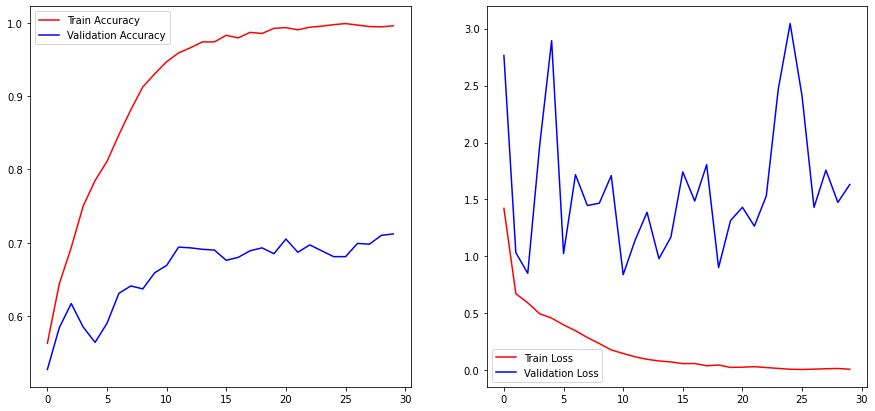

In [53]:
mod.train()

In [54]:
mod.model.evaluate_generator(mod.test_generator, steps=40)

[1.4481793642044067, 0.6980000138282776]

In [56]:
from keras import models

layer_outputs = [layer.output for layer in mod.model.layers[1:]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=mod.model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [57]:
activation_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 150, 150, 16)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 75, 75, 16)        64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640

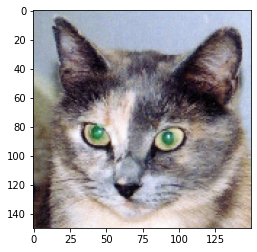

In [58]:
img_path = 'test/cat/1700.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()


In [59]:
activations = activation_model.predict(img_tensor)


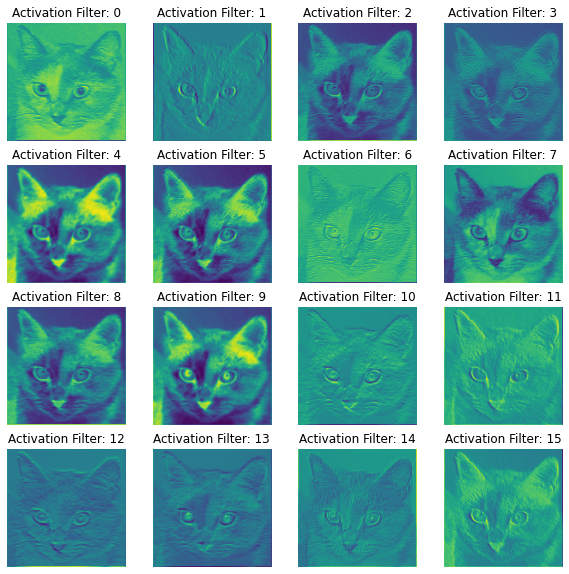

In [60]:
layer_activation = activations[0]
r, c = 4, 4
#         noise = np.random.normal(0, 1, (r * c, self.latent_dim))

fig, axs = plt.subplots(r, c,figsize = (10,10))

cnt = 0
for i in range(r):
  for j in range(c):
    axs[i,j].imshow(layer_activation[0, :,:,cnt], cmap = 'viridis')
    axs[i,j].axis('off')
    axs[i,j].set_title("Activation Filter: " + str(cnt))
    cnt += 1
    #plt.show()
    #plt.close()
plt.show()
#plt.matshow(first_layer_activation[0, :, :, 4])

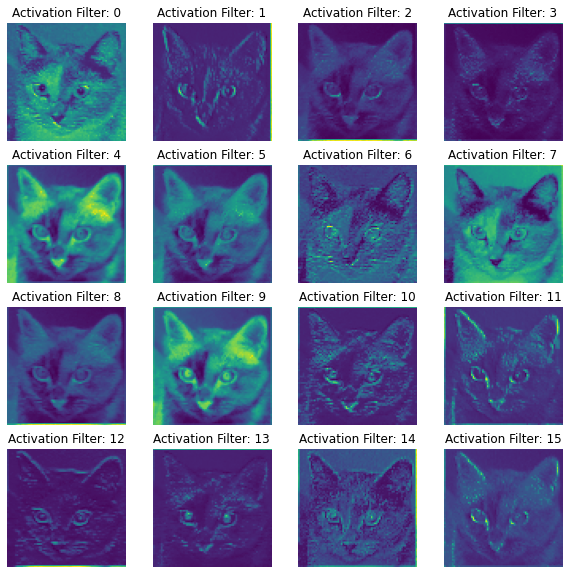

In [61]:
layer_activation = activations[4]
r, c = 4, 4
#         noise = np.random.normal(0, 1, (r * c, self.latent_dim))

fig, axs = plt.subplots(r, c,figsize = (10,10))

cnt = 0
for i in range(r):
  for j in range(c):
    axs[i,j].imshow(layer_activation[0, :,:,cnt], cmap = 'viridis')
    axs[i,j].axis('off')
    axs[i,j].set_title("Activation Filter: " + str(cnt))
    cnt += 1
    #plt.show()
    #plt.close()
plt.show()
#plt.matshow(first_layer_activation[0, :, :, 4])

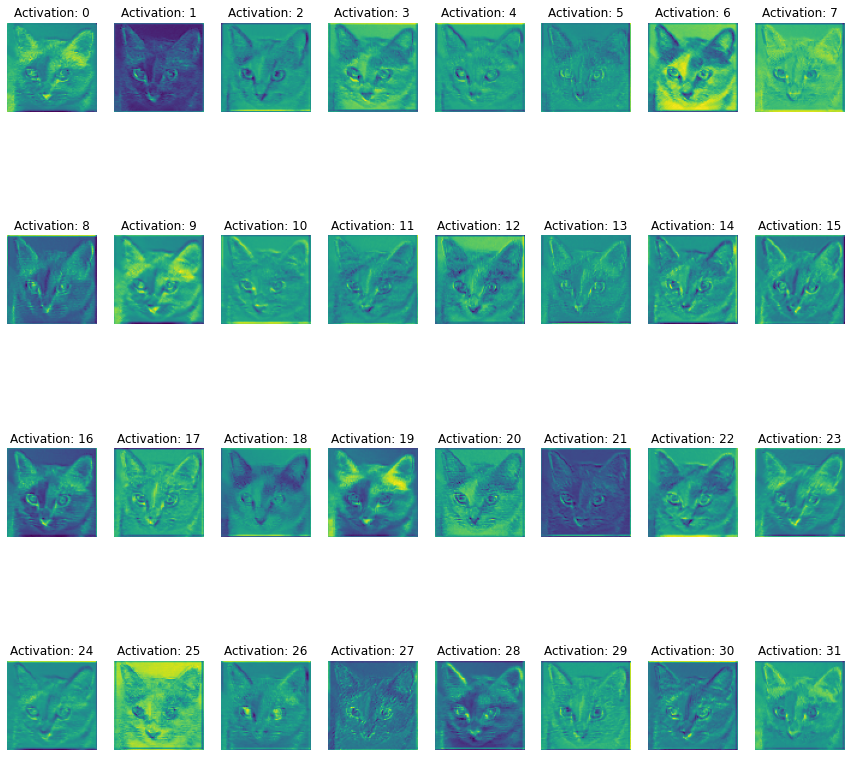

In [62]:
layer_activation = activations[5]
r, c = 4,8
#         noise = np.random.normal(0, 1, (r * c, self.latent_dim))

fig, axs = plt.subplots(r, c,figsize = (15,15))

cnt = 0
for i in range(r):
  for j in range(c):
    axs[i,j].imshow(layer_activation[0, :,:,cnt], cmap = 'viridis')
    axs[i,j].axis('off')
    axs[i,j].set_title("Activation: " + str(cnt))
    cnt += 1
    #plt.show()
    #plt.close()
plt.show()
#plt.matshow(first_layer_activation[0, :, :, 4])

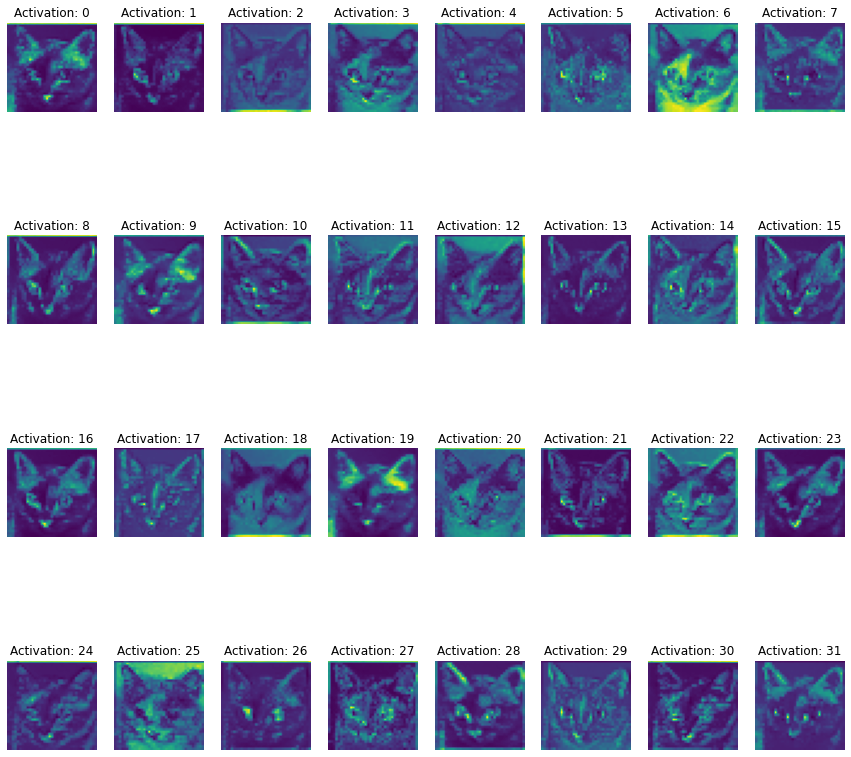

<Figure size 432x288 with 0 Axes>

In [63]:
layer_activation = activations[8]
r, c = 4,8
#         noise = np.random.normal(0, 1, (r * c, self.latent_dim))

fig, axs = plt.subplots(r, c,figsize = (15,15))

cnt = 0
for i in range(r):
  for j in range(c):
    axs[i,j].imshow(layer_activation[0, :,:,cnt], cmap = 'viridis')
    axs[i,j].axis('off')
    axs[i,j].set_title("Activation: " + str(cnt))
    cnt += 1
    #plt.show()
    #plt.close()
plt.show()
plt.tight_layout()
#plt.matshow(first_layer_activation[0, :, :, 4])

*Visualize Filters*

In [64]:
mod.model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 150, 150, 16)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 75, 75, 16)        64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640

In [66]:
layer_name = 'conv2d_9' ## first conv layer of above model name may be change later to change it according 
filter_index = 0

layer_output = mod.model.get_layer(layer_name).output

loss = K.mean(layer_output[:,:,:,filter_index])


In [67]:
def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1
  x += 0.5
  x = np.clip(x, 0, 1)
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [68]:
def generate_pattern(layer_name, filter_index, size = 150):
  
  layer_output = mod.model.get_layer(layer_name).output
  loss = K.mean(layer_output[:,:,:,filter_index])
  
  grads = K.gradients(loss, mod.model.input)[0]
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

  iterate = K.function([mod.model.input], [loss, grads])
  loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
  step = 1.

  img_input_data = np.random.random((1, 150, 150, 3))*20 + 128.

  for i in range(40):
    loss_value, grads_value = iterate([img_input_data])
    img_input_data += grads_value*step
    
  return(deprocess_image(img_input_data[0]))

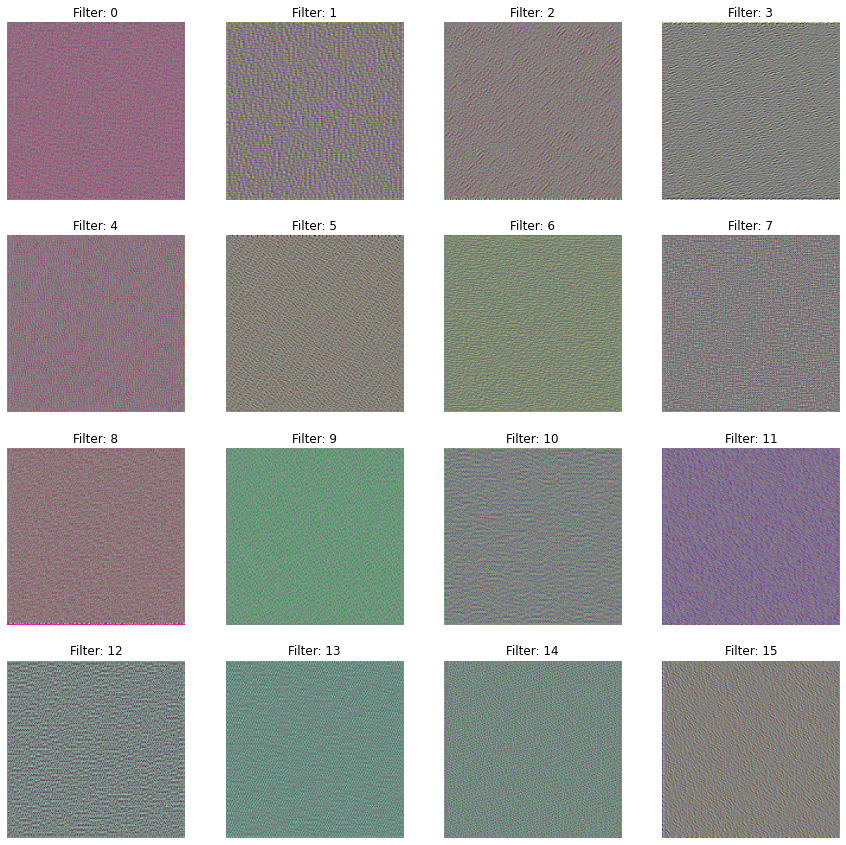

In [70]:
r, c = 4,4
#         noise = np.random.normal(0, 1, (r * c, self.latent_dim))

fig, axs = plt.subplots(r, c,figsize = (15,15))

cnt = 0
for i in range(r):
  for j in range(c):
    axs[i,j].imshow(generate_pattern('batch_normalization_9', cnt))## first batch normalization layer of above 
                                                                    ##model name may be change later to change it according 
    axs[i,j].axis('off')
    axs[i,j].set_title("Filter: " + str(cnt))
    cnt += 1
    #plt.show()
    #plt.close()
plt.show()

#plt.matshow(first_layer_activation[0, :, :, 4])

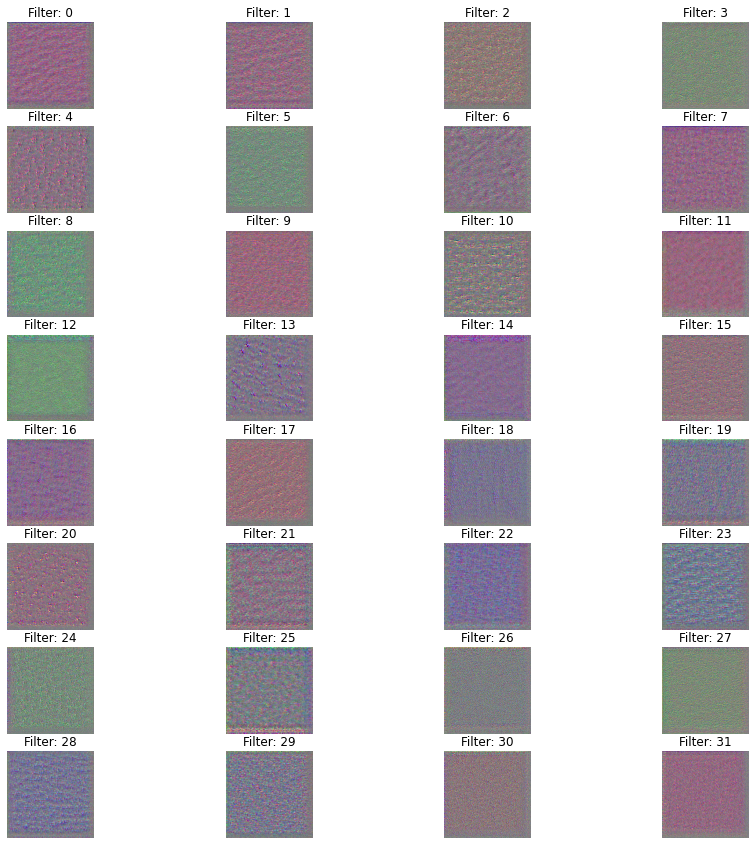

In [72]:
r, c = 8,4
#         noise = np.random.normal(0, 1, (r * c, self.latent_dim))

fig, axs = plt.subplots(r, c,figsize = (15,15))

cnt = 0
for i in range(r):
  for j in range(c):
    axs[i,j].imshow(generate_pattern('conv2d_12', cnt))## last conv layer of above model name may be change later to change it according 
    axs[i,j].axis('off')
    axs[i,j].set_title("Filter: " + str(cnt))
    cnt += 1
    #plt.show()
    #plt.close()
plt.show()

#plt.matshow(first_layer_activation[0, :, :, 4])

VGG16

In [75]:
from keras.applications import VGG16

In [76]:
conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (150, 150, 3))
conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [77]:
def plot_progress(history, epochs = 30):
      history_dict = history.history
      accuracy = history_dict['accuracy']
      val_accuracy = history_dict['val_accuracy']
      loss = history_dict['loss']
      val_loss = history_dict['val_loss']

      fig = plt.figure(figsize=(15,7))
      plt.subplot(1,2,1)
      plt.plot(range(epochs), accuracy, 'r', label = 'Train Accuracy')
      plt.plot(range(epochs), val_accuracy, 'b', label = 'Validation Accuracy')
      plt.legend()

      plt.subplot(1,2,2)
      plt.plot(range(epochs), loss, 'r', label = 'Train Loss')
      plt.plot(range(epochs), val_loss, 'b', label = 'Validation Loss')

      plt.legend()
      plt.show()

In [78]:
vgg_model = Sequential()
vgg_model.add(conv_base)
vgg_model.add(Flatten())
vgg_model.add(Dense(256, activation = 'relu'))
vgg_model.add(Dense(1, activation = 'sigmoid'))
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [79]:
conv_base.trainable = False

In [80]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [81]:
vgg_model.compile(optimizer='RMSProp', loss = 'binary_crossentropy', metrics = ['accuracy'])

fit1 = vgg_model.fit_generator(mod.train_generator,
                                      steps_per_epoch = 40,
                                      epochs = mod.epochs,
                                      validation_data = mod.val_generator,
                                      validation_steps = 40)

Epoch 1/30
17/40 [===========>..................] - ETA: 5s - loss: 1.7494 - accuracy: 0.6106

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expect

39/40 [============================>.] - ETA: 0s - loss: 1.0301 - accuracy: 0.7086

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expe

40/40 [==============================] - 14s 357ms/step - loss: 1.0268 - accuracy: 0.7089 - val_loss: 0.4847 - val_accuracy: 0.6820
Epoch 2/30
40/40 [==============================] - 12s 292ms/step - loss: 0.3922 - accuracy: 0.8274 - val_loss: 0.2902 - val_accuracy: 0.9020
Epoch 3/30
40/40 [==============================] - 12s 310ms/step - loss: 0.3245 - accuracy: 0.8669 - val_loss: 0.9005 - val_accuracy: 0.7190
Epoch 4/30
40/40 [==============================] - 12s 295ms/step - loss: 0.2582 - accuracy: 0.8974 - val_loss: 0.2145 - val_accuracy: 0.8710
Epoch 5/30
40/40 [==============================] - 12s 295ms/step - loss: 0.2301 - accuracy: 0.9055 - val_loss: 0.4144 - val_accuracy: 0.8210
Epoch 6/30
40/40 [==============================] - 12s 296ms/step - loss: 0.1992 - accuracy: 0.9165 - val_loss: 0.2816 - val_accuracy: 0.9090
Epoch 7/30
40/40 [==============================] - 12s 294ms/step - loss: 0.1904 - accuracy: 0.9215 - val_loss: 0.3420 - val_accuracy: 0.9040
Epoch 8/30

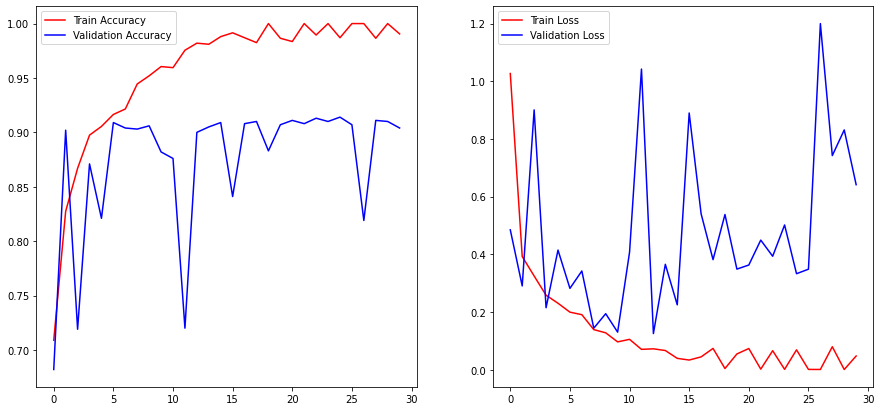

In [82]:
plot_progress(fit1)

In [83]:
vgg_model.evaluate_generator(mod.test_generator, steps=40)

[0.642599880695343, 0.8809999823570251]

In [84]:
conv_base.trainable = True

fit2 = vgg_model.fit_generator(mod.train_generator,
                                      steps_per_epoch = 40,
                                      epochs = mod.epochs,
                                      validation_data = mod.val_generator,
                                      validation_steps = 40)

/opt/conda/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/30
40/40 [==============================] - 13s 337ms/step - loss: 2.7233e-04 - accuracy: 1.0000 - val_loss: 0.9298 - val_accuracy: 0.9080
Epoch 2/30
40/40 [==============================] - 12s 304ms/step - loss: 0.0862 - accuracy: 0.9885 - val_loss: 0.5291 - val_accuracy: 0.8610
Epoch 3/30
40/40 [==============================] - 12s 305ms/step - loss: 5.6042e-04 - accuracy: 1.0000 - val_loss: 0.3857 - val_accuracy: 0.9120
Epoch 4/30
40/40 [==============================] - 12s 298ms/step - loss: 1.2902e-04 - accuracy: 1.0000 - val_loss: 0.8048 - val_accuracy: 0.9050
Epoch 5/30
40/40 [==============================] - 12s 297ms/step - loss: 0.0892 - accuracy: 0.9885 - val_loss: 0.9005 - val_accuracy: 0.9100
Epoch 6/30
40/40 [==============================] - 12s 296ms/step - loss: 1.0808e-04 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9110
Epoch 7/30
40/40 [==============================] - 12s 298ms/step - loss: 7.0843e-05 - accuracy: 1.0000 - val_loss: 0.6057 - 

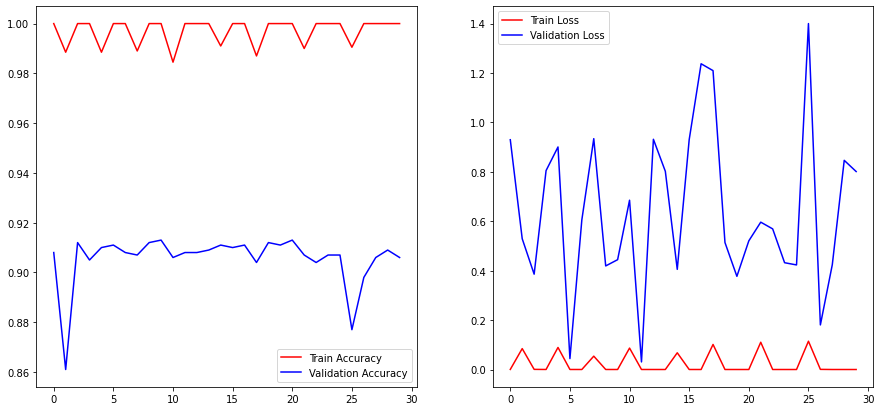

In [85]:
plot_progress(fit2)

In [86]:
vgg_model.evaluate_generator(mod.test_generator, steps=40)

[1.6312843561172485, 0.8880000114440918]

In [88]:
aug_datagen = ImageDataGenerator(rotation_range = 40,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,
                                fill_mode = 'nearest')

aug_train_generator = aug_datagen.flow_from_directory(
        'train/',
        target_size=(150,150),
        batch_size = 50,
        class_mode = 'binary')

aug_val_generator = aug_datagen.flow_from_directory(
        'val/',
        target_size=(150,150),
        batch_size = 50,
        class_mode = 'binary')

aug_test_generator = aug_datagen.flow_from_directory(
        'test/',
        target_size=(150,150),
        batch_size = 50,
        class_mode = 'binary')

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [89]:
conv_base.trainable = False

fit3 = vgg_model.fit_generator(aug_train_generator,
                               steps_per_epoch = 40,
                               epochs = 30,
                               validation_data = aug_val_generator,
                               validation_steps = 40)

Epoch 1/30
40/40 [==============================] - 33s 813ms/step - loss: 28.4954 - accuracy: 0.8884 - val_loss: 7.4577 - val_accuracy: 0.8925
Epoch 2/30
40/40 [==============================] - 29s 719ms/step - loss: 16.1429 - accuracy: 0.8989 - val_loss: 11.0893 - val_accuracy: 0.8875
Epoch 3/30
40/40 [==============================] - 28s 697ms/step - loss: 10.3094 - accuracy: 0.9105 - val_loss: 25.2392 - val_accuracy: 0.8900
Epoch 4/30
40/40 [==============================] - 29s 714ms/step - loss: 8.9775 - accuracy: 0.9140 - val_loss: 2.0649e-10 - val_accuracy: 0.8925
Epoch 5/30
40/40 [==============================] - 28s 699ms/step - loss: 7.4173 - accuracy: 0.9100 - val_loss: 1.4661 - val_accuracy: 0.8885
Epoch 6/30
40/40 [==============================] - 28s 709ms/step - loss: 5.3836 - accuracy: 0.9240 - val_loss: 7.2177 - val_accuracy: 0.8865
Epoch 7/30
40/40 [==============================] - 29s 713ms/step - loss: 5.4449 - accuracy: 0.9100 - val_loss: 1.8190 - val_accurac

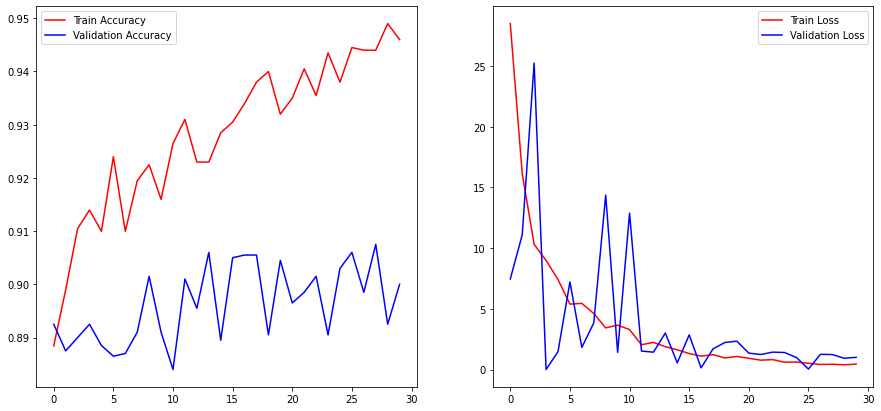

In [90]:
plot_progress(fit3)

In [91]:
vgg_model.evaluate_generator(aug_test_generator, steps=40)

[0.5403764247894287, 0.8914999961853027]